# What does the lepton jet resolution look like?

## Imports

In [1]:
# python
import sys
import os
import importlib
# columnar analysis
from coffea import processor
from coffea.nanoevents import NanoEventsFactory
import awkward as ak
from dask.distributed import Client
# local
sys.path.insert(1, os.path.join(sys.path[0], '../../')) # This is definitely a bit hacky, but I don't mind
from sidm.tools import ffschema, sidm_processor, utilities, scaleout
# always reload local modules to pick up changes during development
importlib.reload(ffschema)
importlib.reload(sidm_processor)
importlib.reload(utilities)
importlib.reload(scaleout)
#plotting
import numpy as np
import matplotlib.pyplot as plt
utilities.set_plot_style()
import hist
from sidm.tools import histogram as h
importlib.reload(h)

<module 'sidm.tools.histogram' from '/home/cms-jovyan/SiDM/SIDM/sidm/studies/../../sidm/tools/histogram.py'>

## Collect sample names from yaml files

In [2]:
all_sample_names = utilities.load_yaml("../configs/ntuple_locations.yaml")

In [3]:
all_sample_names.keys()

dict_keys(['ffntuple_v4', 'ffntuple_v2'])

In [4]:
for key in all_sample_names["ffntuple_v4"]["samples"].keys():
    if "2Mu2E" in key: print(key)

2Mu2E_1000GeV_0p25GeV_0p002mm
2Mu2E_1000GeV_0p25GeV_0p02mm
2Mu2E_1000GeV_0p25GeV_0p2mm
2Mu2E_1000GeV_0p25GeV_1mm
2Mu2E_1000GeV_0p25GeV_2mm
2Mu2E_1000GeV_1p2GeV_0p0096mm
2Mu2E_1000GeV_1p2GeV_0p096mm
2Mu2E_1000GeV_1p2GeV_0p96mm
2Mu2E_1000GeV_1p2GeV_4p8mm
2Mu2E_1000GeV_1p2GeV_9p6mm
2Mu2E_1000GeV_5GeV_0p04mm
2Mu2E_1000GeV_5GeV_0p4mm
2Mu2E_1000GeV_5GeV_20mm
2Mu2E_1000GeV_5GeV_40mm
2Mu2E_1000GeV_5GeV_4mm
2Mu2E_100GeV_0p25GeV_0p02mm
2Mu2E_100GeV_0p25GeV_0p2mm
2Mu2E_100GeV_0p25GeV_10mm
2Mu2E_100GeV_0p25GeV_20mm
2Mu2E_100GeV_0p25GeV_2mm
2Mu2E_100GeV_1p2GeV_0p096mm
2Mu2E_100GeV_1p2GeV_0p96mm
2Mu2E_100GeV_1p2GeV_48mm
2Mu2E_100GeV_1p2GeV_96mm
2Mu2E_100GeV_1p2GeV_9p6mm
2Mu2E_100GeV_5GeV_0p4mm
2Mu2E_100GeV_5GeV_200mm
2Mu2E_100GeV_5GeV_400mm
2Mu2E_100GeV_5GeV_40mm
2Mu2E_100GeV_5GeV_4mm
2Mu2E_150GeV_0p25GeV_0p013mm
2Mu2E_150GeV_0p25GeV_0p13mm
2Mu2E_150GeV_0p25GeV_13mm
2Mu2E_150GeV_0p25GeV_1p3mm
2Mu2E_150GeV_0p25GeV_6p7mm
2Mu2E_150GeV_1p2GeV_0p064mm
2Mu2E_150GeV_1p2GeV_0p64mm
2Mu2E_150GeV_1p2GeV_32mm
2

In [5]:
samples = list(all_sample_names["ffntuple_v4"]["samples"].keys())

## Execution (Dask or Otherwise)

if error seen here: With the DaskExecutor, a different version of the histogram list seems to be called upon.
Then: make sure pip install dependency is upgrading the sidm package, and that the git remote has the latest hists you want.
if error seen here: Dask error
Then: shutdown and start a new Dask session from the coffea casa menu on the left, and maybe try restarting the kernel and try again.

In [6]:
client = scaleout.make_dask_client("tls://localhost:8786")

/opt/conda/lib/python3.8/site-packages/distributed/client.py:1288: VersionMismatchWarning: Mismatched versions found

+---------+----------------+----------------+----------------+
| Package | client         | scheduler      | workers        |
+---------+----------------+----------------+----------------+
| python  | 3.8.16.final.0 | 3.8.16.final.0 | 3.8.15.final.0 |
+---------+----------------+----------------+----------------+
  warnings.warn(version_module.VersionMismatchWarning(msg[0]["warning"]))


Comment out the DaskExecutor line and swap with FuturesExecutor line if you wish to run Dask free. And you can skip this ^

In [6]:
# You can use the samples below if you're developing new hists and want to test those out. 
# PLEASE NOTE: Dask only works if the remote repo already has thew new hists
# samples = ["2Mu2E_100GeV_1p2GeV_0p096mm"]
# samples_toPlot = ['2Mu2E_100GeV_1p2GeV_0p096mm']
# samples = [
#     "2Mu2E_100GeV_0p25GeV_0p02mm",
#     "2Mu2E_100GeV_0p25GeV_0p2mm",
#     "2Mu2E_100GeV_0p25GeV_2mm",
#     "2Mu2E_100GeV_0p25GeV_10mm",
#     "2Mu2E_100GeV_0p25GeV_20mm",
#     "2Mu2E_100GeV_1p2GeV_0p096mm",
#     "2Mu2E_100GeV_1p2GeV_0p96mm",
#     "2Mu2E_100GeV_1p2GeV_48mm",
#     "2Mu2E_100GeV_1p2GeV_96mm",
#     "2Mu2E_100GeV_1p2GeV_9p6mm",
#     "2Mu2E_100GeV_5GeV_0p4mm",
#     "2Mu2E_100GeV_5GeV_4mm",
#     "2Mu2E_100GeV_5GeV_40mm",
#     "2Mu2E_100GeV_5GeV_200mm",
#     "2Mu2E_100GeV_5GeV_400mm",
# ]
# samples = [
#     "2Mu2E_100GeV_0p25GeV_0p02mm",
#     "2Mu2E_100GeV_0p25GeV_0p2mm",
#     "2Mu2E_100GeV_0p25GeV_2mm",
#     "2Mu2E_100GeV_0p25GeV_10mm",
#     "2Mu2E_100GeV_0p25GeV_20mm",
#     "2Mu2E_100GeV_1p2GeV_0p096mm",
#     "2Mu2E_100GeV_1p2GeV_0p96mm",
#     "2Mu2E_100GeV_1p2GeV_48mm",
#     "2Mu2E_100GeV_1p2GeV_96mm",
#     "2Mu2E_100GeV_1p2GeV_9p6mm",
#     "2Mu2E_100GeV_5GeV_4mm",
#     "2Mu2E_100GeV_5GeV_40mm",
#     "2Mu2E_100GeV_5GeV_200mm",
#     "2Mu2E_100GeV_5GeV_400mm",
#     "2Mu2E_100GeV_5GeV_0p4mm",
#     "2Mu2E_150GeV_5GeV_0p27mm",
#     "2Mu2E_200GeV_5GeV_0p2mm",
#     "2Mu2E_500GeV_5GeV_0p8mm",
#     "2Mu2E_800GeV_5GeV_0p5mm",
#     "2Mu2E_1000GeV_5GeV_0p4mm"
# ]
samples = [
    "2Mu2E_100GeV_0p25GeV_0p02mm",
    "2Mu2E_100GeV_0p25GeV_0p2mm",
    "2Mu2E_100GeV_0p25GeV_2mm",
    "2Mu2E_100GeV_0p25GeV_10mm",
    "2Mu2E_100GeV_0p25GeV_20mm",
    "2Mu2E_100GeV_1p2GeV_0p096mm",
    "2Mu2E_100GeV_1p2GeV_0p96mm",
    "2Mu2E_100GeV_1p2GeV_48mm",
    "2Mu2E_100GeV_1p2GeV_96mm",
    "2Mu2E_100GeV_1p2GeV_9p6mm",
    "2Mu2E_100GeV_5GeV_0p4mm",
    "2Mu2E_100GeV_5GeV_4mm",
    "2Mu2E_100GeV_5GeV_40mm",
    "2Mu2E_100GeV_5GeV_200mm",
    "2Mu2E_100GeV_5GeV_400mm",
    "2Mu2E_1000GeV_0p25GeV_0p002mm",
    "2Mu2E_1000GeV_0p25GeV_0p02mm",
    "2Mu2E_1000GeV_0p25GeV_0p2mm",
    "2Mu2E_1000GeV_0p25GeV_1mm",
    "2Mu2E_1000GeV_0p25GeV_2mm",
    "2Mu2E_1000GeV_5GeV_0p04mm",
    "2Mu2E_1000GeV_5GeV_0p4mm",
    "2Mu2E_1000GeV_5GeV_20mm",
    "2Mu2E_1000GeV_5GeV_40mm",
    "2Mu2E_1000GeV_5GeV_4mm",
    "2Mu2E_150GeV_5GeV_0p27mm",
    "2Mu2E_200GeV_5GeV_0p2mm",
    "2Mu2E_500GeV_5GeV_0p8mm",
    "2Mu2E_800GeV_5GeV_0p5mm",
]

fileset = utilities.make_fileset(samples, "ffntuple_v4")

runner = processor.Runner(
    executor=processor.FuturesExecutor(),
    # executor=processor.DaskExecutor(client=client),
    schema=ffschema.FFSchema,
)

p = sidm_processor.SidmProcessor(
    [
        "2mu2e_matchedLj",
    ],
    ["base_plus_gen_resolution"]
)

output = runner.run(fileset, treename="ffNtuplizer/ffNtuple", processor_instance=p)

Output()

concurrent.futures.process._RemoteTraceback: 
"""
Traceback (most recent call last):
  File "/opt/conda/lib/python3.8/concurrent/futures/process.py", line 239, in _process_worker
    r = call_item.fn(*call_item.args, **call_item.kwargs)
  File "/opt/conda/lib/python3.8/site-packages/coffea/processor/executor.py", line 1367, in automatic_retries
    raise e
  File "/opt/conda/lib/python3.8/site-packages/coffea/processor/executor.py", line 1336, in automatic_retries
    return func(*args, **kwargs)
  File "/opt/conda/lib/python3.8/site-packages/coffea/processor/executor.py", line 1417, in metadata_fetcher
    with uproot.open({item.filename: None}, timeout=xrootdtimeout) as file:
  File "/opt/conda/lib/python3.8/site-packages/uproot/reading.py", line 141, in open
    file = ReadOnlyFile(
  File "/opt/conda/lib/python3.8/site-packages/uproot/reading.py", line 580, in __init__
    self._source = Source(
  File "/opt/conda/lib/python3.8/site-packages/uproot/source/xrootd.py", line 453, in _

OSError: XRootD error: [FATAL] Auth failed: No protocols left to try
in file root://xcache//store/group/lpcmetx/SIDM/ffNtupleV4/2018/SIDM_XXTo2ATo2Mu2E_mXX-100_mA-0p25_ctau-10_TuneCP5_13TeV-madgraph-pythia8/RunIIAutumn18DRPremix-102X_upgrade2018_realistic_v15-v1/210326_152735/0000/ffNtuple_1.root

In [ ]:
output['out']['2Mu2E_100GeV_1p2GeV_0p096mm']['hists'].keys()

In [8]:
# samples_toPlot = ['2Mu2E_100GeV_1p2GeV_0p096mm']

## Ratio of LJ pT to dark photon pT

### Vary Resonance Mass

In [9]:
samples_toPlot = [
    "2Mu2E_100GeV_5GeV_0p4mm",
    "2Mu2E_150GeV_5GeV_0p27mm",
    "2Mu2E_200GeV_5GeV_0p2mm",
    "2Mu2E_500GeV_5GeV_0p8mm",
    "2Mu2E_800GeV_5GeV_0p5mm",
    "2Mu2E_1000GeV_5GeV_0p4mm"
]

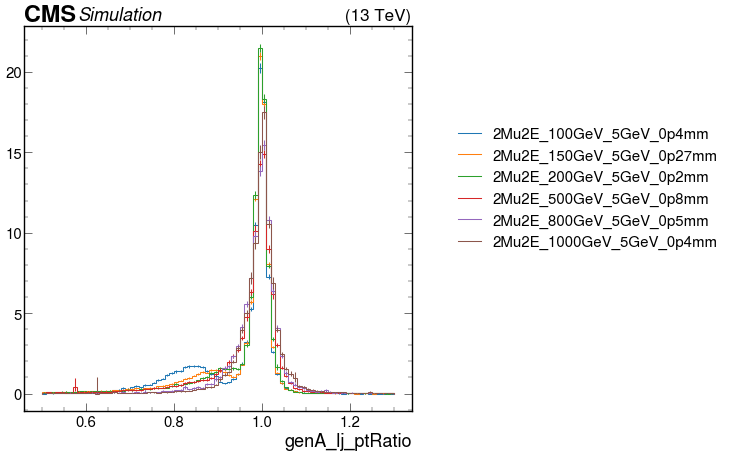

In [10]:
utilities.plot([output['out'][f"{name}"]['hists']["genA_lj_ptRatio"]["2mu2e_matchedLj",0.5j:1.3j] for name in samples_toPlot], density=True)
plt.legend(samples_toPlot, loc=(1.1,0.4));

Overall improvement in LJet pT resolution is seen with rising resonance mass / collimation

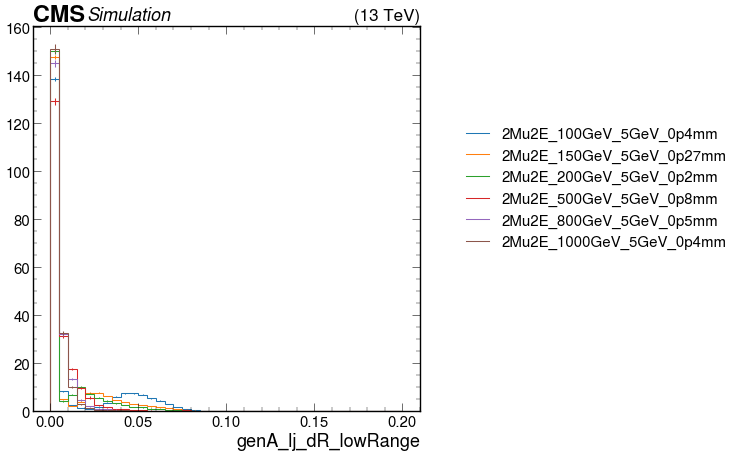

In [14]:
utilities.plot([output['out'][f"{name}"]['hists']["genA_lj_dR_lowRange"]["2mu2e_matchedLj",0j:0.2j] for name in samples_toPlot], density=True)
plt.legend(samples_toPlot, loc=(1.1,0.4));

Looks like the LJets get better aligned the more collimated the system gets with rising resonance mass

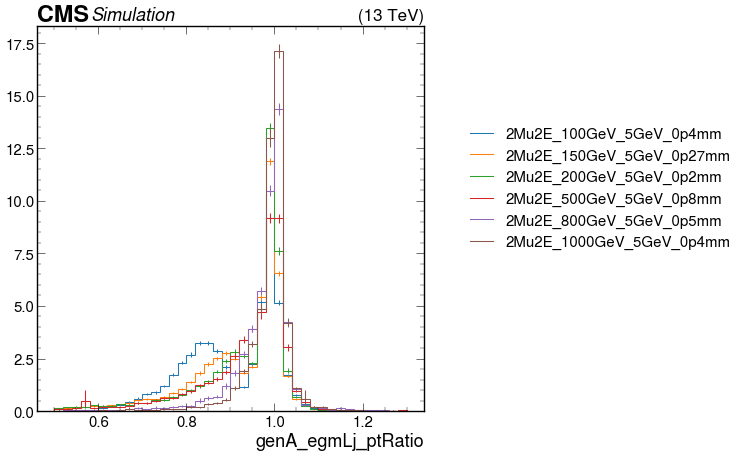

In [16]:
utilities.plot([output['out'][f"{name}"]['hists']["genA_egmLj_ptRatio"]["2mu2e_matchedLj",0.5j:1.3j:2j] for name in samples_toPlot], density=True)
plt.legend(samples_toPlot, loc=(1.1,0.4));

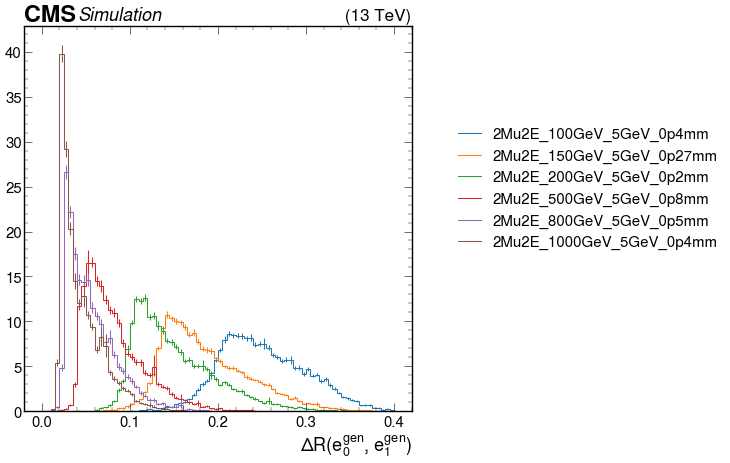

In [17]:
utilities.plot([output['out'][f"{name}"]['hists']["genE_genE_dR"]["2mu2e_matchedLj",0j:0.4j] for name in samples_toPlot], density=True)
plt.legend(samples_toPlot, loc=(1.1,0.4));

Dramatic improvement in EGamma jet resolution with rising resonance mass / collimation.

Where does that asymmetry come from? (Spoiler, this likely has to do with lost particles in the LJ since the dR e-e is larger)

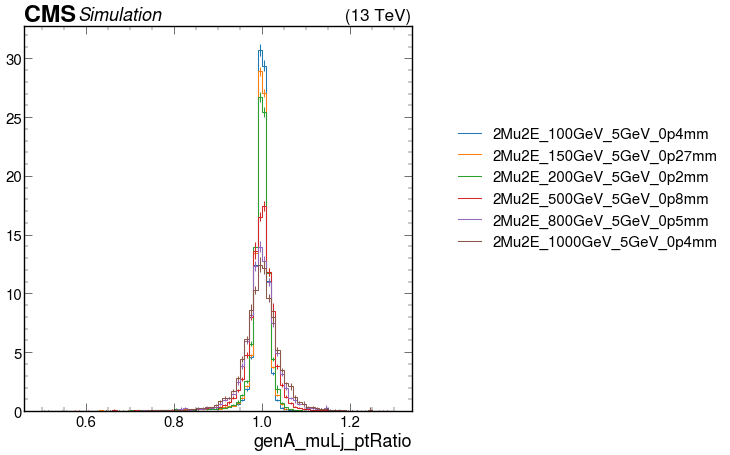

In [18]:
utilities.plot([output['out'][f"{name}"]['hists']["genA_muLj_ptRatio"]["2mu2e_matchedLj",0.5j:1.3j] for name in samples_toPlot], density=True)
plt.legend(samples_toPlot, loc=(1.1,0.4));

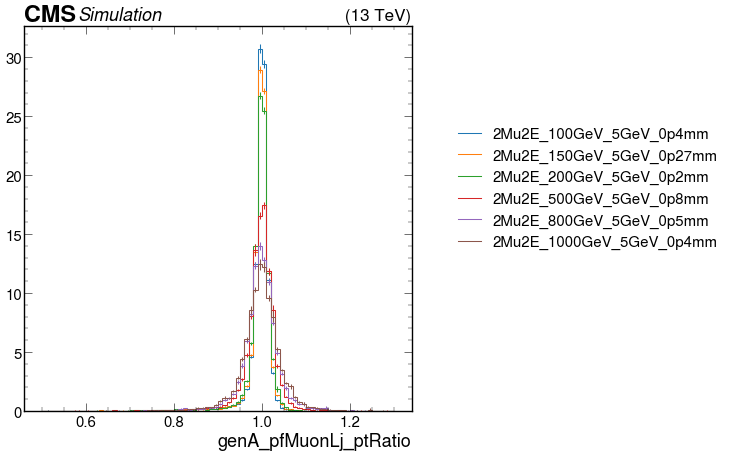

In [19]:
utilities.plot([output['out'][f"{name}"]['hists']["genA_pfMuonLj_ptRatio"]["2mu2e_matchedLj",0.5j:1.3j] for name in samples_toPlot], density=True)
plt.legend(samples_toPlot, loc=(1.1,0.4));

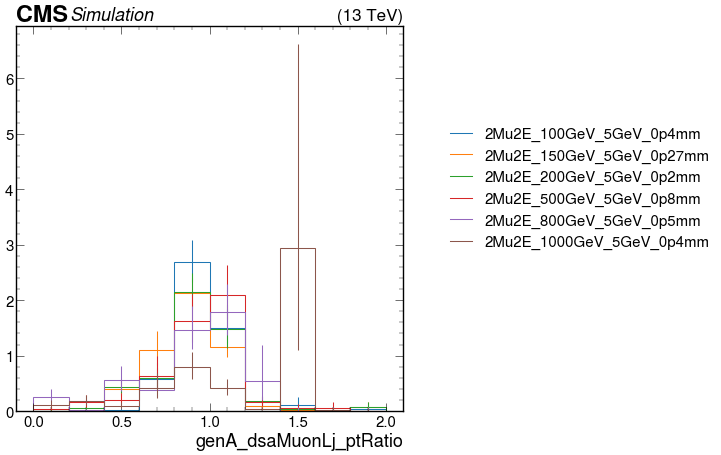

In [23]:
utilities.plot([output['out'][f"{name}"]['hists']["genA_dsaMuonLj_ptRatio"]["2mu2e_matchedLj",::20j] for name in samples_toPlot], density=True)
plt.legend(samples_toPlot, loc=(1.1,0.4));

Visibly worse resolution as displacement gets large

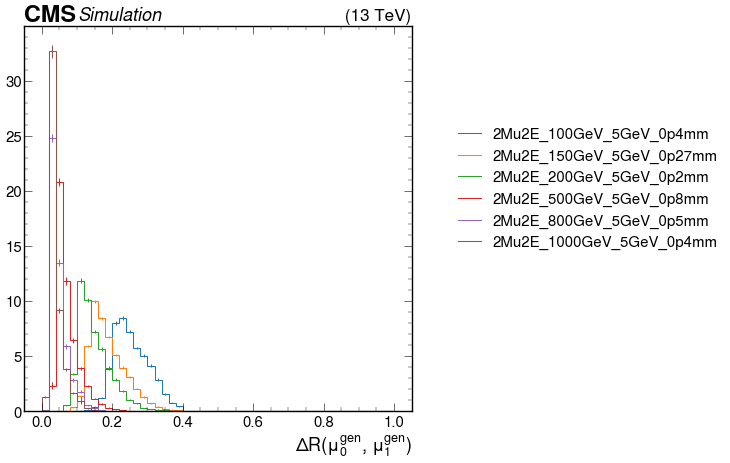

In [24]:
utilities.plot([output['out'][f"{name}"]['hists']["genMu_genMu_dR"]["2mu2e_matchedLj",:] for name in samples_toPlot], density=True)
plt.legend(samples_toPlot, loc=(1.1,0.4));

#### WEIRD! 
The resolution of Muon LJets seems to get worse with larger resonance mass / collimation. Larger Resonance mass means the system of 2 DP should be more boosted, overlapping hits might mean lost infomration about the 2 muon system since we don't have Calo cells to help here.

### Vary DP mass / lifetime

#### mX 100 GeV, mDP 5 GeV

In [25]:
samples_toPlot = [
    "2Mu2E_100GeV_5GeV_0p4mm",
    "2Mu2E_100GeV_5GeV_4mm",
    "2Mu2E_100GeV_5GeV_40mm",
    "2Mu2E_100GeV_5GeV_200mm",
    "2Mu2E_100GeV_5GeV_400mm",
]

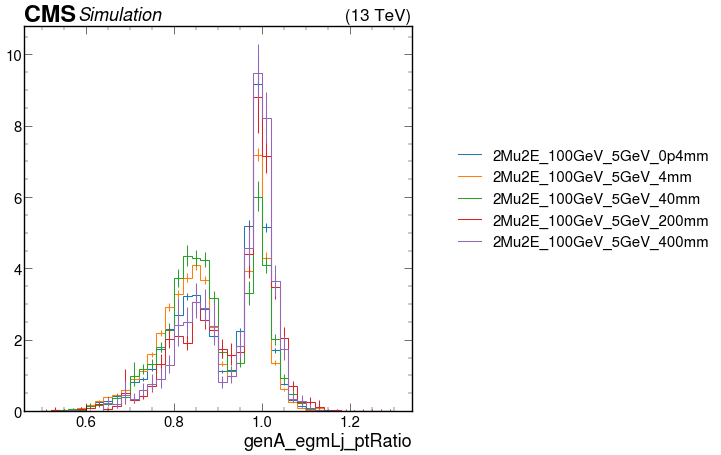

In [26]:
utilities.plot([output['out'][f"{name}"]['hists']["genA_egmLj_ptRatio"]["2mu2e_matchedLj",0.5j:1.3j:2j] for name in samples_toPlot], density=True)
plt.legend(samples_toPlot, loc=(1.1,0.4));

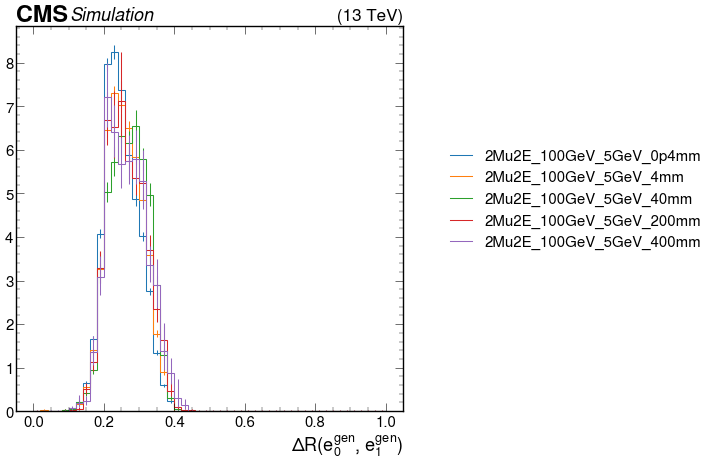

In [30]:
utilities.plot([output['out'][f"{name}"]['hists']["genE_genE_dR"]["2mu2e_matchedLj",::4j] for name in samples_toPlot], density=True)
plt.legend(samples_toPlot, loc=(1.1,0.4));

EGM res worse with rising displacement (green), then better (red/purple)?

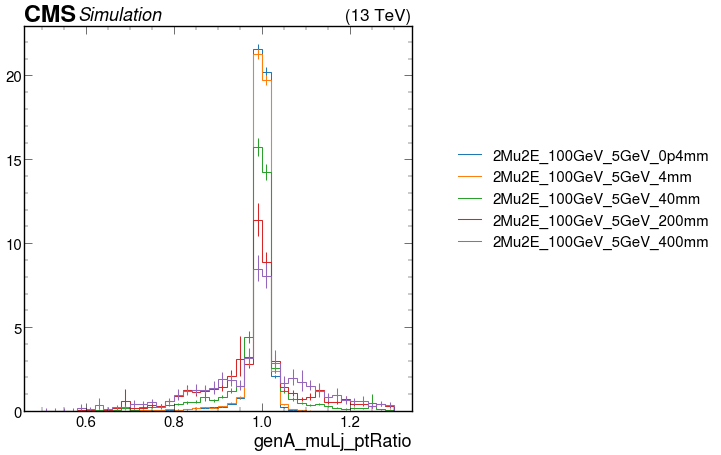

In [31]:
utilities.plot([output['out'][f"{name}"]['hists']["genA_muLj_ptRatio"]["2mu2e_matchedLj",0.5j:1.3j:2j] for name in samples_toPlot], density=True)
plt.legend(samples_toPlot, loc=(1.1,0.4));

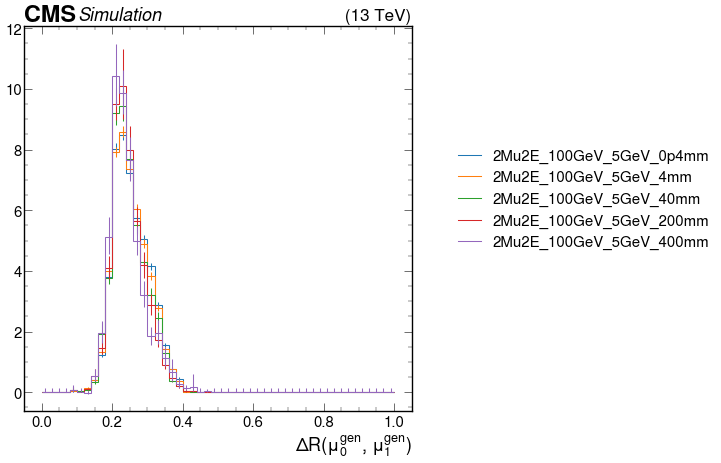

In [32]:
utilities.plot([output['out'][f"{name}"]['hists']["genMu_genMu_dR"]["2mu2e_matchedLj",:] for name in samples_toPlot], density=True)
plt.legend(samples_toPlot, loc=(1.1,0.4));

Mu LJ res gets worse with rising displacement.

#### mX 100 GeV, mDP 1.2 GeV

In [33]:
samples_toPlot = [
    "2Mu2E_100GeV_1p2GeV_0p096mm",
    "2Mu2E_100GeV_1p2GeV_0p96mm",
    "2Mu2E_100GeV_1p2GeV_9p6mm",
    "2Mu2E_100GeV_1p2GeV_48mm",
    "2Mu2E_100GeV_1p2GeV_96mm",
]

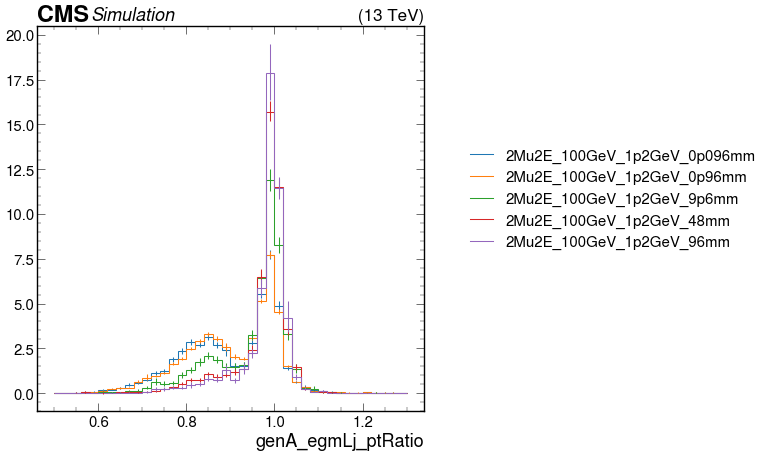

In [34]:
utilities.plot([output['out'][f"{name}"]['hists']["genA_egmLj_ptRatio"]["2mu2e_matchedLj",0.5j:1.3j:2j] for name in samples_toPlot], density=True)
plt.legend(samples_toPlot, loc=(1.1,0.4));

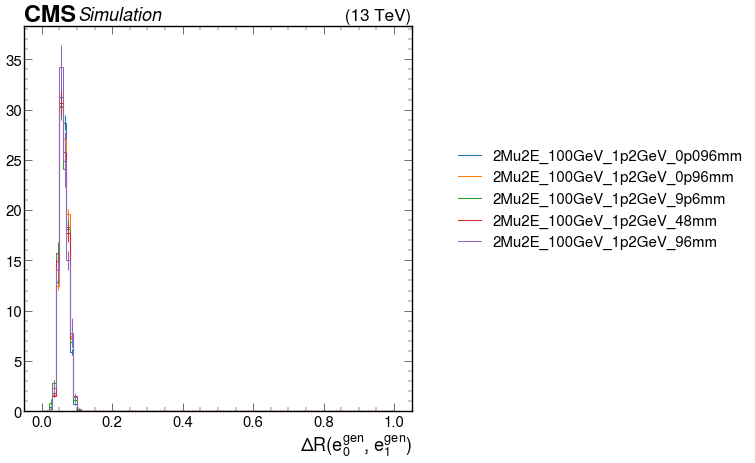

In [36]:
utilities.plot([output['out'][f"{name}"]['hists']["genE_genE_dR"]["2mu2e_matchedLj",::2j] for name in samples_toPlot], density=True)
plt.legend(samples_toPlot, loc=(1.1,0.4));

EGM Lj Res better with rising displacement.

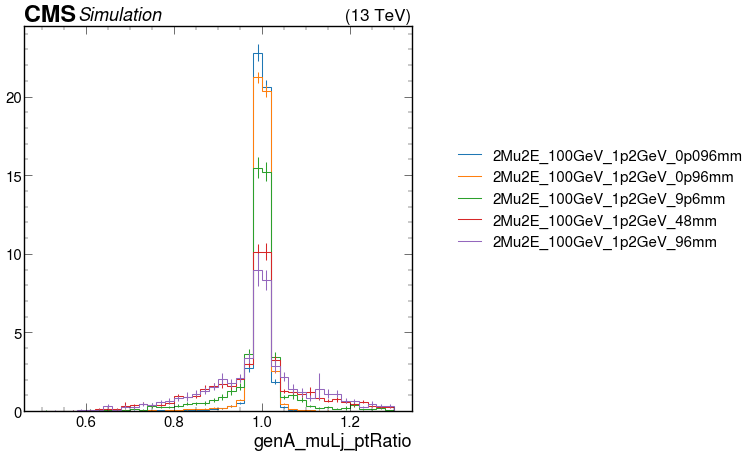

In [37]:
utilities.plot([output['out'][f"{name}"]['hists']["genA_muLj_ptRatio"]["2mu2e_matchedLj",0.5j:1.3j:2j] for name in samples_toPlot], density=True)
plt.legend(samples_toPlot, loc=(1.1,0.4));

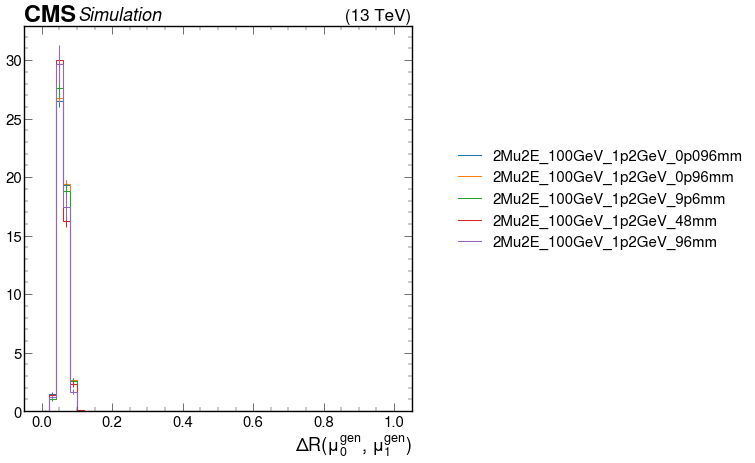

In [38]:
utilities.plot([output['out'][f"{name}"]['hists']["genMu_genMu_dR"]["2mu2e_matchedLj",:] for name in samples_toPlot], density=True)
plt.legend(samples_toPlot, loc=(1.1,0.4));

Mu LJ res gets worse with rising displacement.

#### mX 100 GeV, mDP 0.25 GeV

In [39]:
samples_toPlot = [
    "2Mu2E_100GeV_0p25GeV_0p02mm",
    "2Mu2E_100GeV_0p25GeV_0p2mm",
    "2Mu2E_100GeV_0p25GeV_2mm",
    "2Mu2E_100GeV_0p25GeV_10mm",
    "2Mu2E_100GeV_0p25GeV_20mm",
]

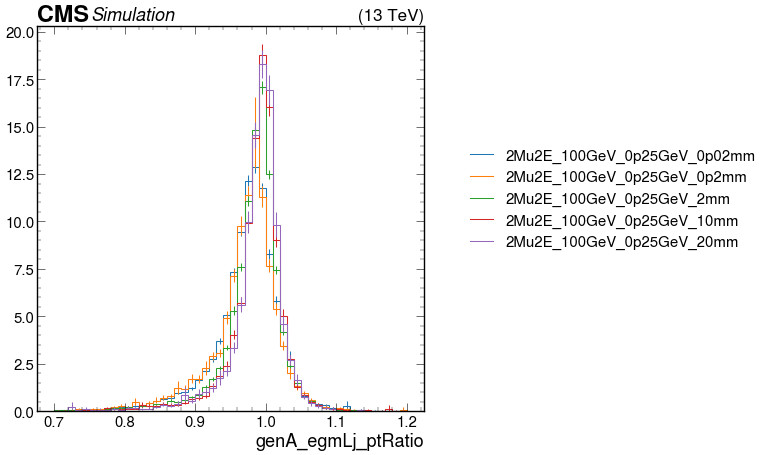

In [40]:
utilities.plot([output['out'][f"{name}"]['hists']["genA_egmLj_ptRatio"]["2mu2e_matchedLj",0.7j:1.2j:1j] for name in samples_toPlot], density=True)
plt.legend(samples_toPlot, loc=(1.1,0.4));

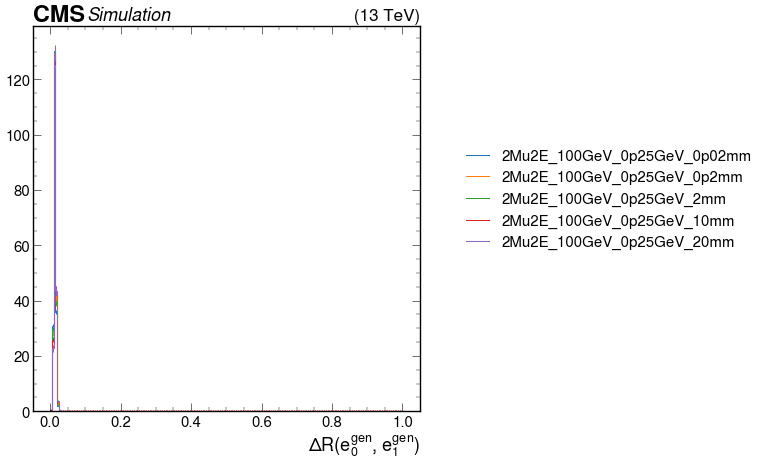

In [41]:
utilities.plot([output['out'][f"{name}"]['hists']["genE_genE_dR"]["2mu2e_matchedLj",:] for name in samples_toPlot], density=True)
plt.legend(samples_toPlot, loc=(1.1,0.4));

Asymmetrical component is now gone, thanks to lower mDP the system is overall more collimated. So we dont have missing particles in the EGM jets. Resolution gets better with rising displacement

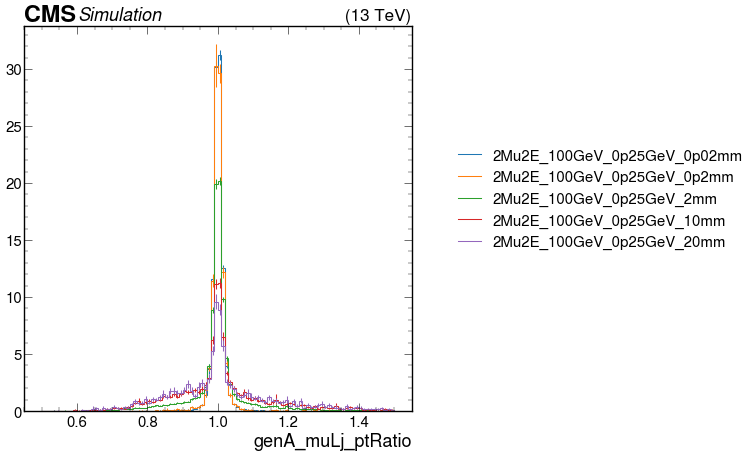

In [42]:
utilities.plot([output['out'][f"{name}"]['hists']["genA_muLj_ptRatio"]["2mu2e_matchedLj",0.5j:1.5j:1j] for name in samples_toPlot], density=True)
plt.legend(samples_toPlot, loc=(1.1,0.4));

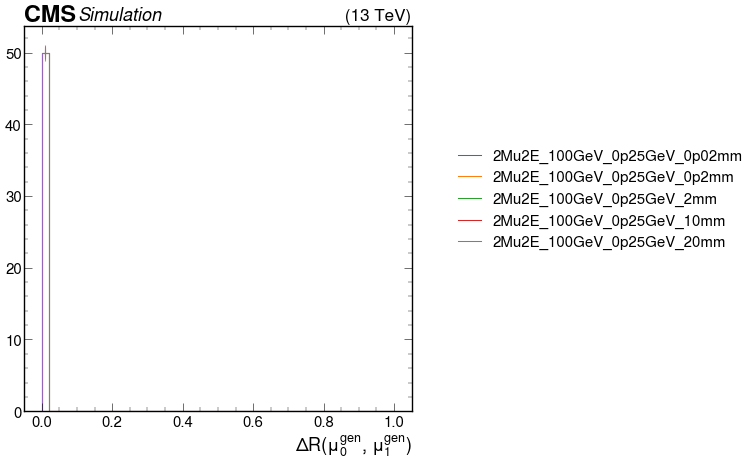

In [43]:
utilities.plot([output['out'][f"{name}"]['hists']["genMu_genMu_dR"]["2mu2e_matchedLj",:] for name in samples_toPlot], density=True)
plt.legend(samples_toPlot, loc=(1.1,0.4));

Muon LJ resolution gets worse with rising displacement

#### mX 100 GeV
Look at Res and DR with diff mDP

In [44]:
samples_toPlot = [
    "2Mu2E_100GeV_0p25GeV_2mm",
    "2Mu2E_100GeV_1p2GeV_0p96mm",
    "2Mu2E_100GeV_5GeV_4mm",
]

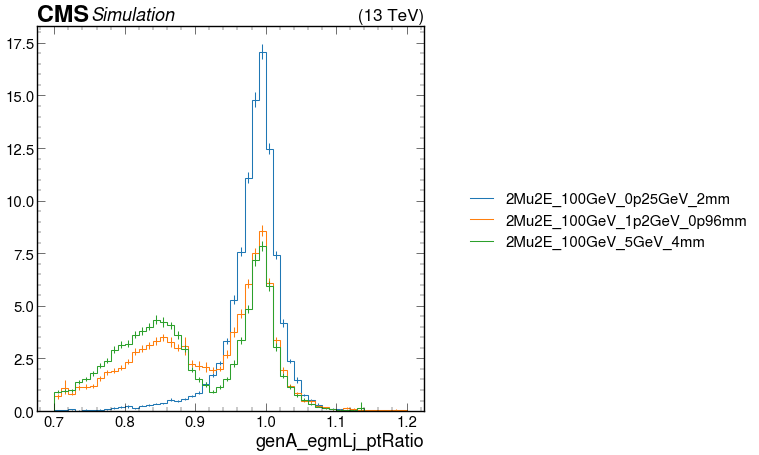

In [45]:
utilities.plot([output['out'][f"{name}"]['hists']["genA_egmLj_ptRatio"]["2mu2e_matchedLj",0.7j:1.2j:1j] for name in samples_toPlot], density=True)
plt.legend(samples_toPlot, loc=(1.1,0.4));

split into lead / sublead

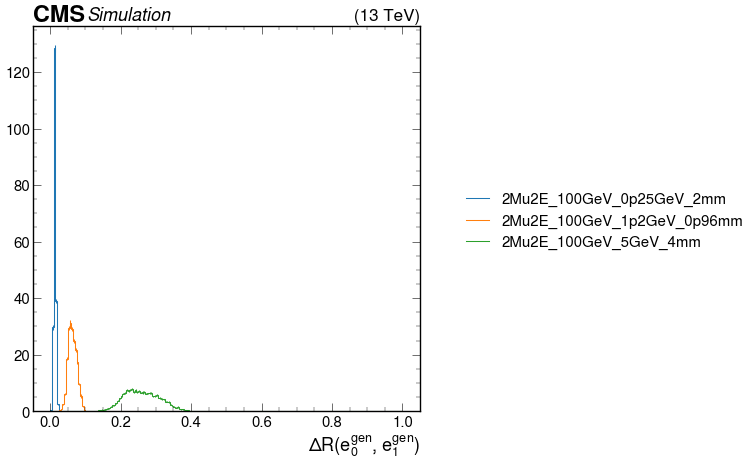

In [46]:
utilities.plot([output['out'][f"{name}"]['hists']["genE_genE_dR"]["2mu2e_matchedLj",:] for name in samples_toPlot], density=True)
plt.legend(samples_toPlot, loc=(1.1,0.4));

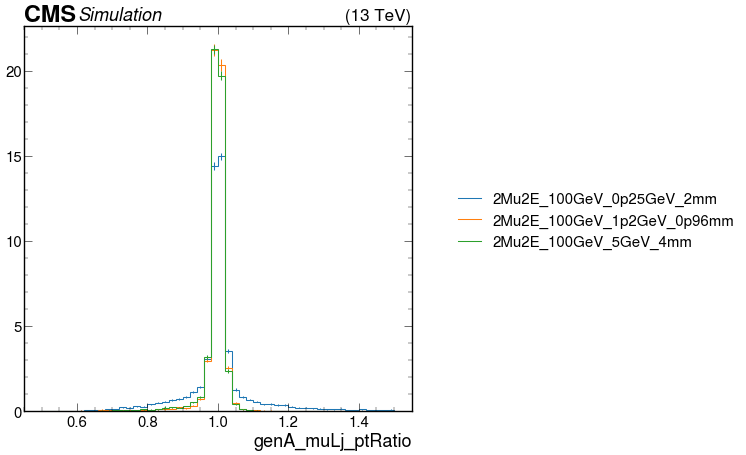

In [47]:
utilities.plot([output['out'][f"{name}"]['hists']["genA_muLj_ptRatio"]["2mu2e_matchedLj",0.5j:1.5j:2j] for name in samples_toPlot], density=True)
plt.legend(samples_toPlot, loc=(1.1,0.4));

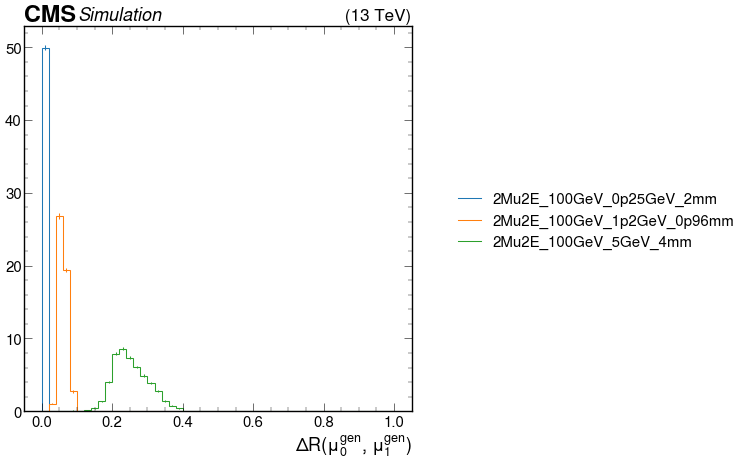

In [48]:
utilities.plot([output['out'][f"{name}"]['hists']["genMu_genMu_dR"]["2mu2e_matchedLj",:] for name in samples_toPlot], density=True)
plt.legend(samples_toPlot, loc=(1.1,0.4));

Would be nice to see how this varies with bound state mass, dark photon decay length, and dsa- vs pf-muons.

Lepton Resolution would be good to look at directly

## DSA Muons, DSA pT / closest genMuon pT

In [49]:
samples_toPlot = [
    "2Mu2E_100GeV_0p25GeV_2mm",
    "2Mu2E_100GeV_1p2GeV_0p96mm",
    "2Mu2E_100GeV_5GeV_4mm",
]

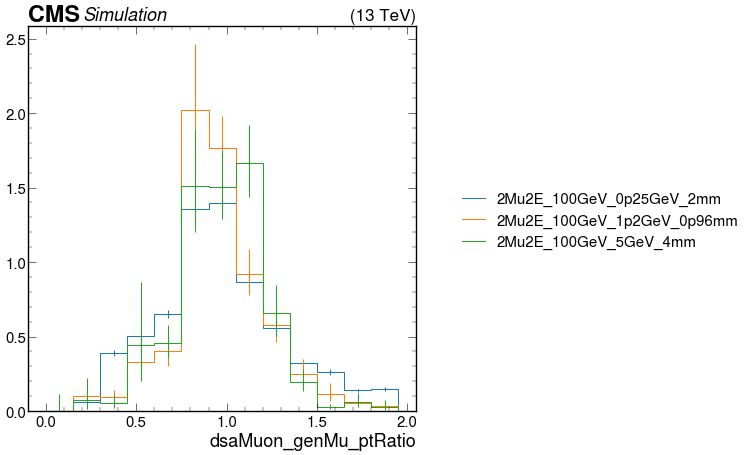

In [58]:
utilities.plot([output['out'][f"{name}"]['hists']["dsaMuon_genMu_ptRatio"]["2mu2e_matchedLj",0j:2j:15j] for name in samples_toPlot], density=True)
plt.legend(samples_toPlot, loc=(1.1,0.4));

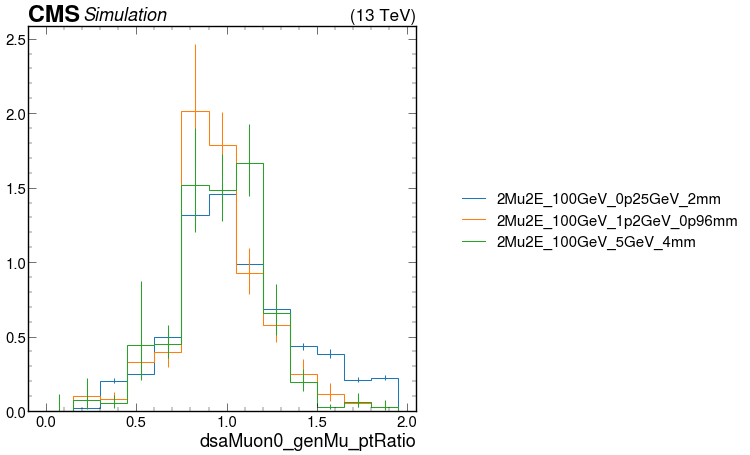

In [55]:
utilities.plot([output['out'][f"{name}"]['hists']["dsaMuon0_genMu_ptRatio"]["2mu2e_matchedLj",0.0j:2.0j:15j] for name in samples_toPlot], density=True)
plt.legend(samples_toPlot, loc=(1.1,0.4));

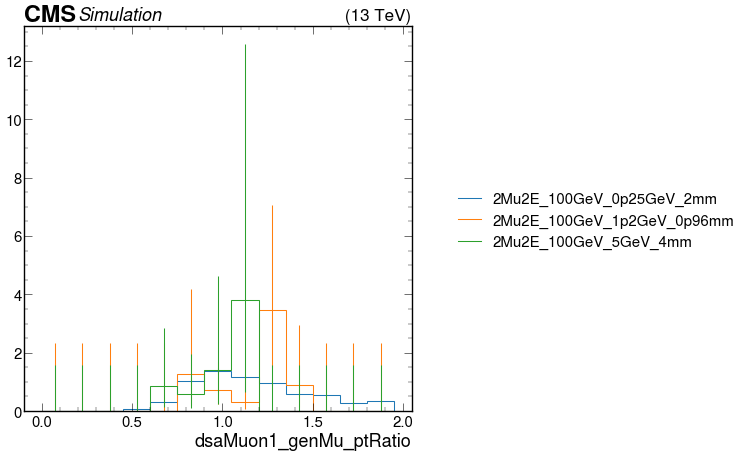

In [54]:
utilities.plot([output['out'][f"{name}"]['hists']["dsaMuon1_genMu_ptRatio"]["2mu2e_matchedLj",0.0j:2.0j:15j] for name in samples_toPlot], density=True)
plt.legend(samples_toPlot, loc=(1.1,0.4));

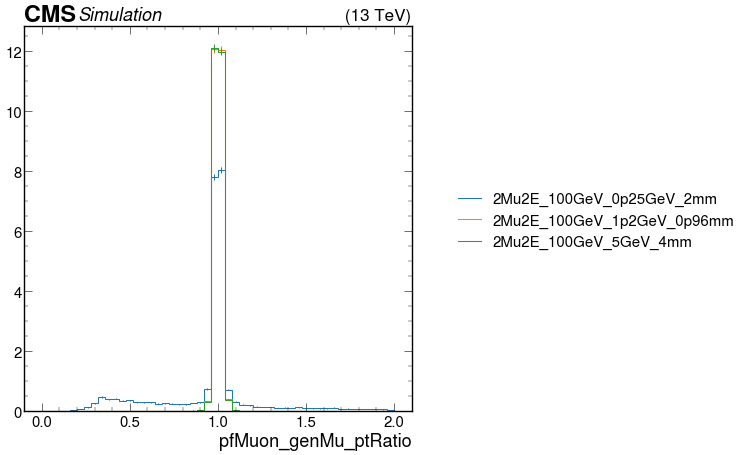

In [64]:
utilities.plot([output['out'][f"{name}"]['hists']["pfMuon_genMu_ptRatio"]["2mu2e_matchedLj",0.0j:2.0j:4j] for name in samples_toPlot], density=True)
plt.legend(samples_toPlot, loc=(1.1,0.4));

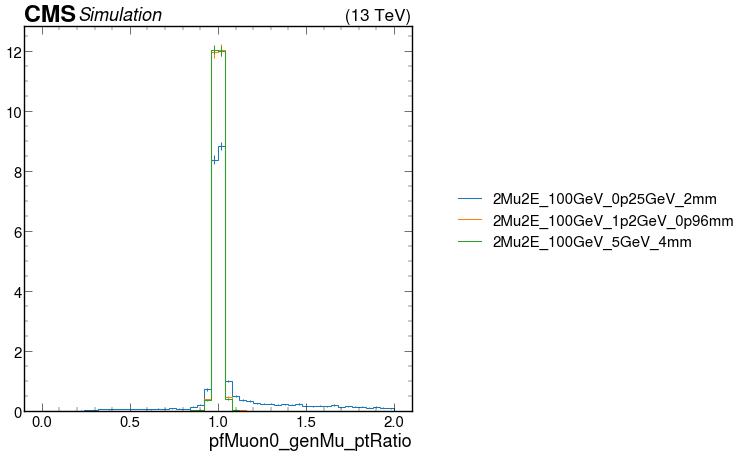

In [65]:
utilities.plot([output['out'][f"{name}"]['hists']["pfMuon0_genMu_ptRatio"]["2mu2e_matchedLj",0.0j:2.0j:4j] for name in samples_toPlot], density=True)
plt.legend(samples_toPlot, loc=(1.1,0.4));

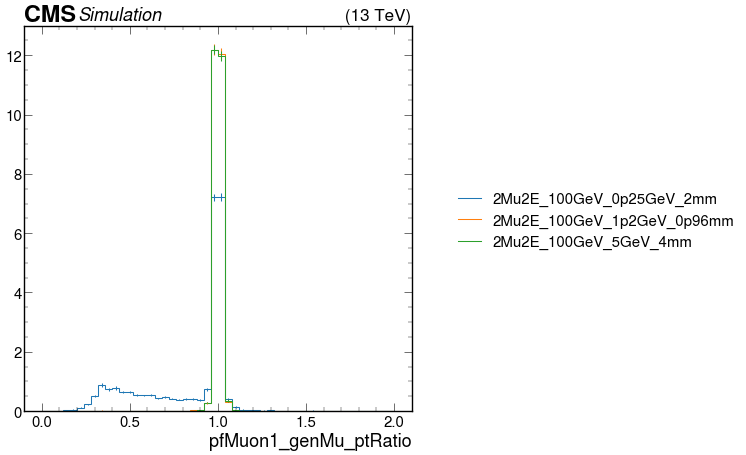

In [66]:
utilities.plot([output['out'][f"{name}"]['hists']["pfMuon1_genMu_ptRatio"]["2mu2e_matchedLj",0.0j:2.0j:4j] for name in samples_toPlot], density=True)
plt.legend(samples_toPlot, loc=(1.1,0.4));

Hard to tell how the dsaMuon res changes with DP mass, but for PF muons its clear that the most boosted case has the worst resolution

### Vary Resonance Mass

In [67]:
samples_toPlot = [
    "2Mu2E_100GeV_5GeV_0p4mm",
    "2Mu2E_150GeV_5GeV_0p27mm",
    "2Mu2E_200GeV_5GeV_0p2mm",
    "2Mu2E_500GeV_5GeV_0p8mm",
    "2Mu2E_800GeV_5GeV_0p5mm",
    "2Mu2E_1000GeV_5GeV_0p4mm"
]

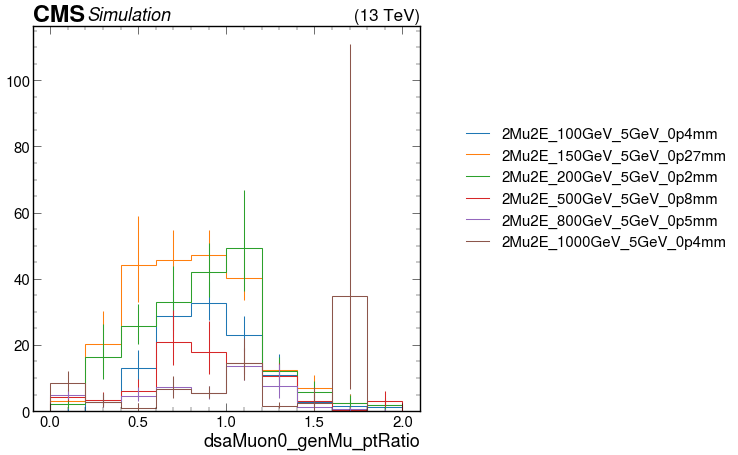

In [72]:
utilities.plot([output['out'][f"{name}"]['hists']["dsaMuon0_genMu_ptRatio"]["2mu2e_matchedLj",0.0j:2.0j:20j] for name in samples_toPlot], density=False)
plt.legend(samples_toPlot, loc=(1.1,0.4));

Here it looks like DSA muon res does get worse with greater collimation

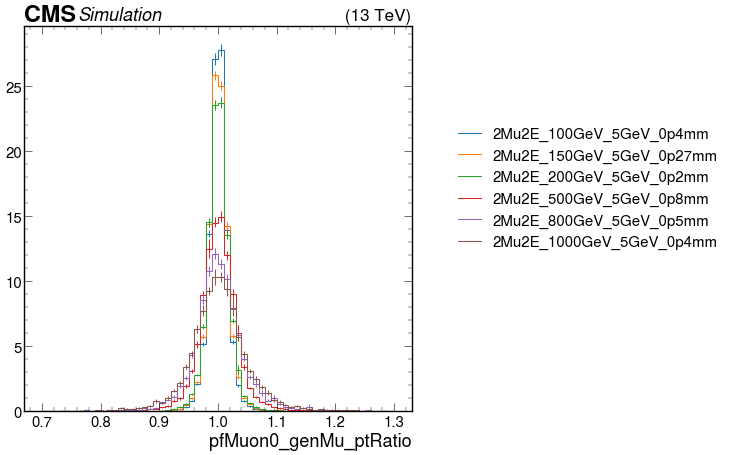

In [73]:
utilities.plot([output['out'][f"{name}"]['hists']["pfMuon0_genMu_ptRatio"]["2mu2e_matchedLj",0.7j:1.3j:1j] for name in samples_toPlot], density=True)
plt.legend(samples_toPlot, loc=(1.1,0.4));

Large resonance means more collimation / boost. It seems for DSA Muons and PF Muons, this seems to make the lepton resolutions worse. 

And does this degradation of DSA + PF muons with collimation/boost make sense? Given that we don't have Calo cells to resolve things, greater collimation/boost hurting us does make sense

### Vary DP Mass / Lifetime

#### mX 100 GeV, mDP 1.2 GeV

In [74]:
samples_toPlot = [
    "2Mu2E_100GeV_1p2GeV_0p096mm",
    "2Mu2E_100GeV_1p2GeV_0p96mm",
    "2Mu2E_100GeV_1p2GeV_9p6mm",
    "2Mu2E_100GeV_1p2GeV_48mm",
    "2Mu2E_100GeV_1p2GeV_96mm",
]

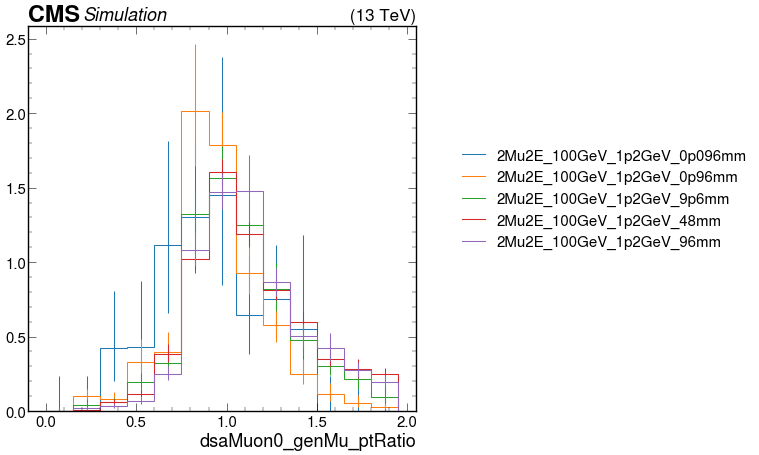

In [75]:
utilities.plot([output['out'][f"{name}"]['hists']["dsaMuon0_genMu_ptRatio"]["2mu2e_matchedLj",0.0j:2.0j:15j] for name in samples_toPlot], density=True)
plt.legend(samples_toPlot, loc=(1.1,0.4));

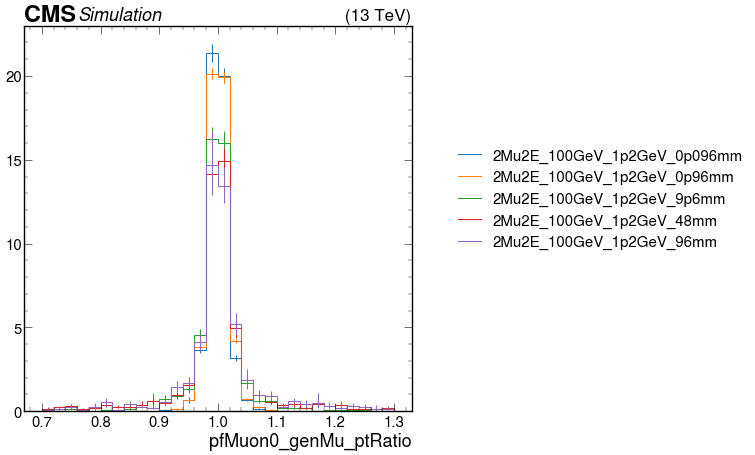

In [76]:
utilities.plot([output['out'][f"{name}"]['hists']["pfMuon0_genMu_ptRatio"]["2mu2e_matchedLj",0.7j:1.3j:2j] for name in samples_toPlot], density=True)
plt.legend(samples_toPlot, loc=(1.1,0.4));

The muon-type LJ Res got worse with rising displacement.

This might make sense in the context of what jets are formed as displacement grows. For DSA muons, the res doesn't change much with DP mass, which makes sense cause its already displaced. But for PF muons, growing displacement is actively making things worse as the tracker info gets lost.

#### We should look at Displacement VS PF/DSA fraction to confirm this intuition

#### mX 1000 GeV

In [91]:
samples_toPlot = [
    "2Mu2E_1000GeV_0p25GeV_0p002mm",
    "2Mu2E_1000GeV_0p25GeV_0p02mm",
    "2Mu2E_1000GeV_0p25GeV_0p2mm",
    "2Mu2E_1000GeV_0p25GeV_1mm",
    "2Mu2E_1000GeV_0p25GeV_2mm",
    "2Mu2E_1000GeV_5GeV_0p04mm",
    "2Mu2E_1000GeV_5GeV_0p4mm",
    "2Mu2E_1000GeV_5GeV_4mm",
    "2Mu2E_1000GeV_5GeV_20mm",
    "2Mu2E_1000GeV_5GeV_40mm",
]
cmap = plt.cm.get_cmap('viridis')
colors = cmap(np.linspace(0, 1, len(samples_toPlot)))

/tmp/ipykernel_213/2710521463.py:13: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed two minor releases later. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap(obj)`` instead.
  cmap = plt.cm.get_cmap('viridis')


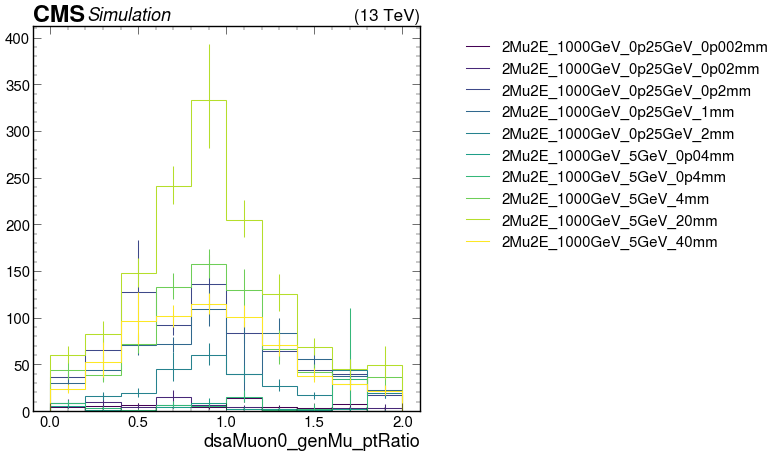

In [80]:
utilities.plot([output['out'][f"{name}"]['hists']["dsaMuon0_genMu_ptRatio"]["2mu2e_matchedLj",0.0j:2.0j:20j] for name in samples_toPlot], density=False, color=colors)
plt.legend(samples_toPlot, loc=(1.1,0.4));
# plt.ylim(top=3, bottom=0)

/opt/conda/lib/python3.8/site-packages/mplhep/error_estimation.py:38: RuntimeWarning: All sumw are zero!  Cannot compute meaningful error bars
  warnings.warn(


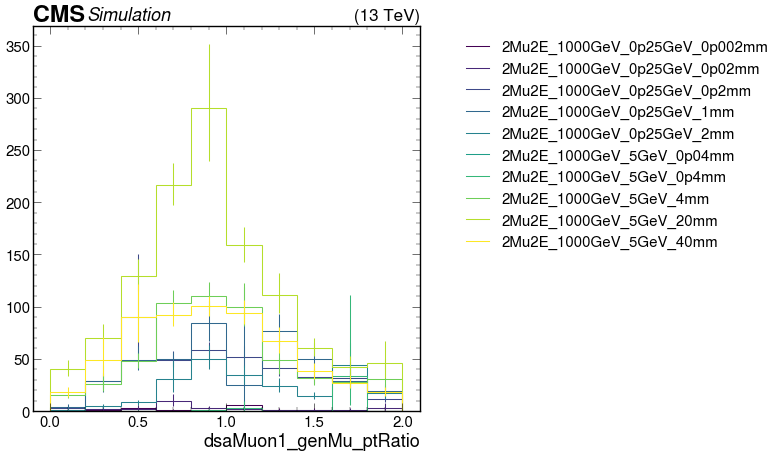

In [81]:
utilities.plot([output['out'][f"{name}"]['hists']["dsaMuon1_genMu_ptRatio"]["2mu2e_matchedLj",0.0j:2.0j:20j] for name in samples_toPlot], density=False, color=colors)
plt.legend(samples_toPlot, loc=(1.1,0.4));
# plt.ylim(top=3, bottom=0)

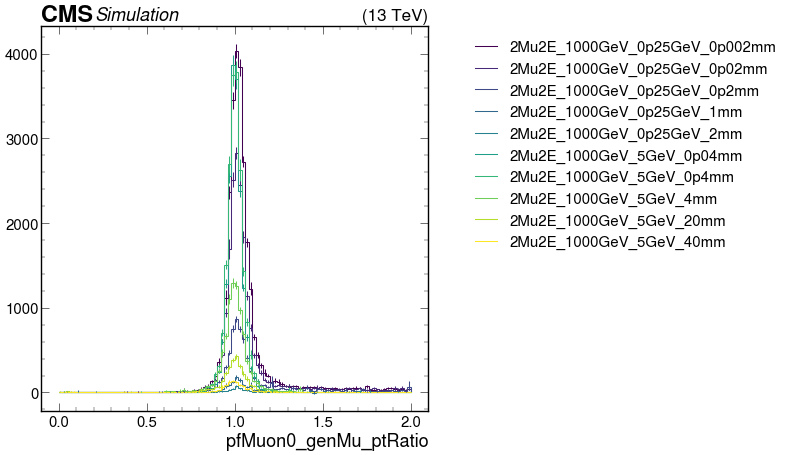

In [92]:
utilities.plot([output['out'][f"{name}"]['hists']["pfMuon0_genMu_ptRatio"]["2mu2e_matchedLj",0.0j:2.0j:2j] for name in samples_toPlot], density=False, color=colors)
plt.legend(samples_toPlot, loc=(1.1,0.4));

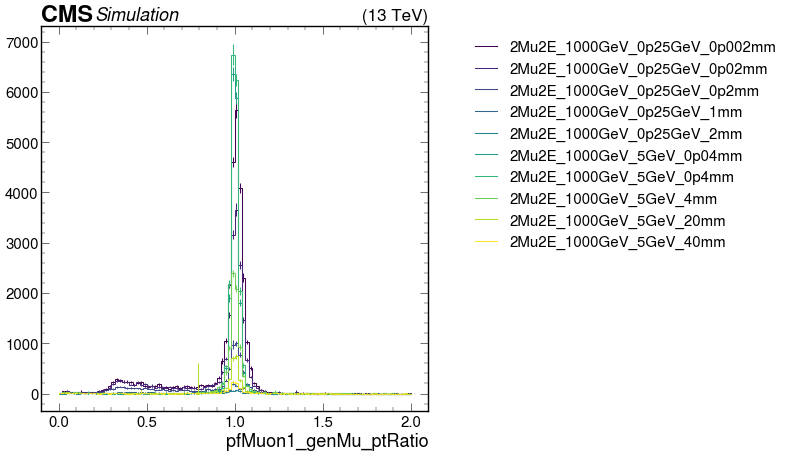

In [93]:
utilities.plot([output['out'][f"{name}"]['hists']["pfMuon1_genMu_ptRatio"]["2mu2e_matchedLj",0.0j:2.0j:2j] for name in samples_toPlot], density=False, color=colors)
plt.legend(samples_toPlot, loc=(1.1,0.4));

Same trend here, 1000 GeV m_X is a bridge too far for DSA muons, and even then the most displaced folks seem to fare poorly. When we look at PF muons, again things don't like to be too displaced.

Let's confirm this with Lxy studies

## LJ/genA pT Versus Lxy

### mX = 1000 GeV case

In [94]:
samples_toPlot = [
    "2Mu2E_1000GeV_0p25GeV_0p002mm",
    "2Mu2E_1000GeV_0p25GeV_0p02mm",
    "2Mu2E_1000GeV_0p25GeV_0p2mm",
    "2Mu2E_1000GeV_0p25GeV_1mm",
    "2Mu2E_1000GeV_0p25GeV_2mm",
    "2Mu2E_1000GeV_5GeV_0p04mm",
    "2Mu2E_1000GeV_5GeV_0p4mm",
    "2Mu2E_1000GeV_5GeV_4mm",
    "2Mu2E_1000GeV_5GeV_20mm",
    "2Mu2E_1000GeV_5GeV_40mm",
]
cmap = plt.cm.get_cmap('viridis')
colors = cmap(np.linspace(0, 1, len(samples_toPlot)))

/tmp/ipykernel_213/2710521463.py:13: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed two minor releases later. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap(obj)`` instead.
  cmap = plt.cm.get_cmap('viridis')


### Muon type LJ and DSA/PF Muons

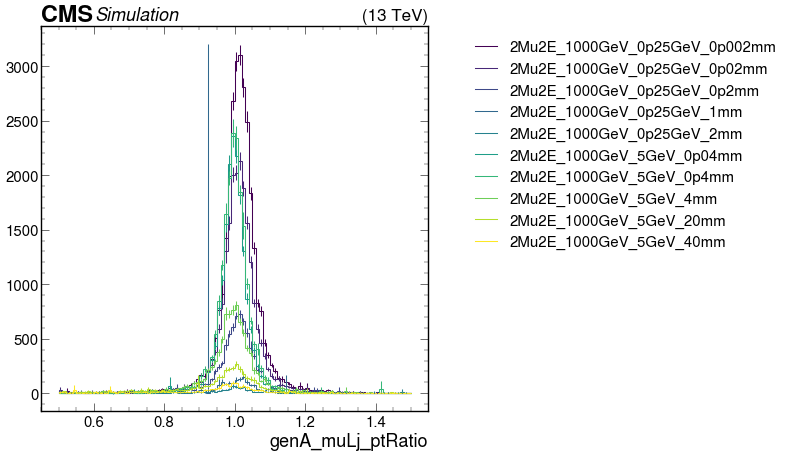

In [96]:
utilities.plot([output['out'][f"{name}"]['hists']["genA_muLj_ptRatio"]["2mu2e_matchedLj",0.5j:1.5j:1j] for name in samples_toPlot], density=False, color=colors)
plt.legend(samples_toPlot, loc=(1.1,0.4));

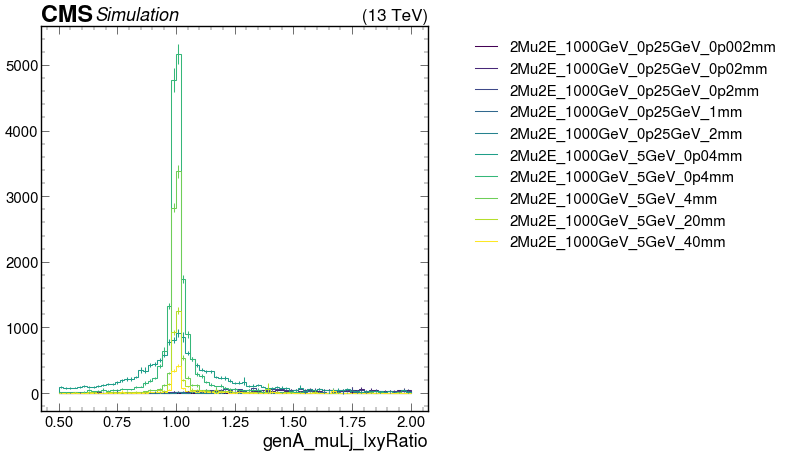

In [101]:
utilities.plot([output['out'][f"{name}"]['hists']["genA_muLj_lxyRatio"]["2mu2e_matchedLj",0.5j:2.0j:2j] for name in samples_toPlot], density=False, color=colors)
plt.legend(samples_toPlot, loc=(1.1,0.4));

The above suggests that the reco and true lxy definitions are reasonable

In [102]:
# for name in samples_toPlot:
#     f, ax = plt.subplots()
#     utilities.plot(output['out'][f"{name}"]['hists']["mu_lj_genA_ptRatio_vs_lxy"]["2mu2e_matchedLj",::4j,0j:50j:1j])
#     plt.text(0.05, 0.8, fr"{name}", color='white', transform = ax.transAxes)
#     plt.show()

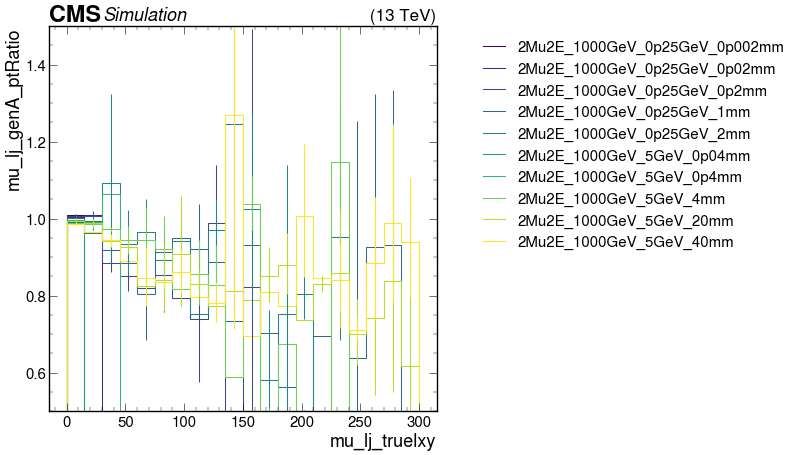

In [107]:
utilities.plot([output['out'][f"{name}"]['hists']["mu_lj_genA_ptRatio_vs_truelxy"]["2mu2e_matchedLj",::1j,::5j].profile("mu_lj_genA_ptRatio") for name in samples_toPlot], color=colors)
plt.ylim(top=1.5, bottom=0.5)
plt.ylabel("mu_lj_genA_ptRatio")
plt.legend(samples_toPlot, loc=(1.1,0.4));

The above suggests that the Mu LJ pT res gets worse with rising displacement, this is in agreement with what we saw from the plain muon/genMu pT ratio plots also.

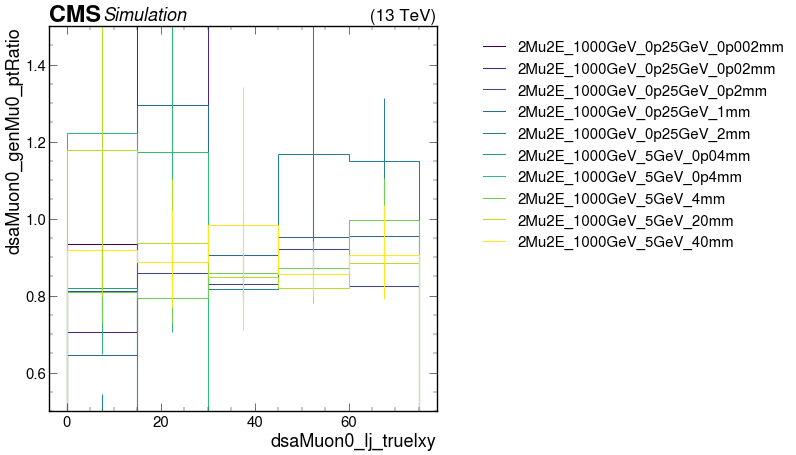

In [112]:
utilities.plot([output['out'][f"{name}"]['hists']["dsaMuon0_genMu0_ptRatio_vs_truelxy"]["2mu2e_matchedLj",::1j,0j:75j:5j].profile("dsaMuon0_genMu0_ptRatio") for name in samples_toPlot], color=colors)
plt.ylabel("dsaMuon0_genMu0_ptRatio")
plt.ylim(top=1.5, bottom=0.5)
plt.legend(samples_toPlot, loc=(1.1,0.4));

/opt/conda/lib/python3.8/site-packages/matplotlib/axes/_axes.py:1185: RuntimeWarning: All-NaN axis encountered
  miny = np.nanmin(masked_verts[..., 1])
/opt/conda/lib/python3.8/site-packages/matplotlib/axes/_axes.py:1186: RuntimeWarning: All-NaN axis encountered
  maxy = np.nanmax(masked_verts[..., 1])
/opt/conda/lib/python3.8/site-packages/matplotlib/axes/_axes.py:1185: RuntimeWarning: All-NaN axis encountered
  miny = np.nanmin(masked_verts[..., 1])
/opt/conda/lib/python3.8/site-packages/matplotlib/axes/_axes.py:1186: RuntimeWarning: All-NaN axis encountered
  maxy = np.nanmax(masked_verts[..., 1])
/opt/conda/lib/python3.8/site-packages/matplotlib/axes/_axes.py:1185: RuntimeWarning: All-NaN axis encountered
  miny = np.nanmin(masked_verts[..., 1])
/opt/conda/lib/python3.8/site-packages/matplotlib/axes/_axes.py:1186: RuntimeWarning: All-NaN axis encountered
  maxy = np.nanmax(masked_verts[..., 1])
/opt/conda/lib/python3.8/site-packages/matplotlib/axes/_axes.py:1185: RuntimeWarning: Al

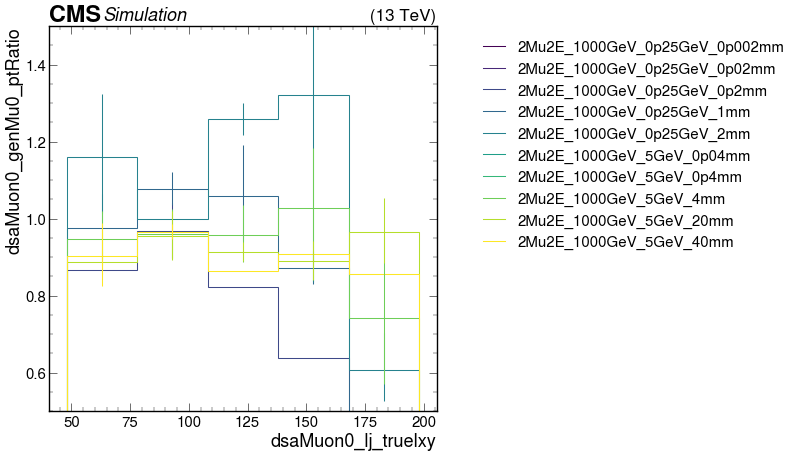

In [113]:
utilities.plot([output['out'][f"{name}"]['hists']["dsaMuon0_genMu0_ptRatio_vs_truelxy"]["2mu2e_matchedLj",::1j,50j:200j:10j].profile("dsaMuon0_genMu0_ptRatio") for name in samples_toPlot], color=colors)
plt.ylabel("dsaMuon0_genMu0_ptRatio")
plt.ylim(top=1.5, bottom=0.5)
plt.legend(samples_toPlot, loc=(1.1,0.4));

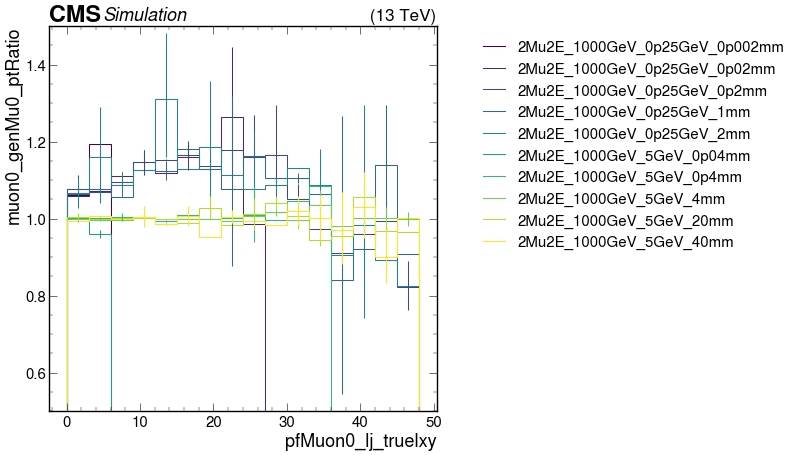

In [114]:
utilities.plot([output['out'][f"{name}"]['hists']["muon0_genMu0_ptRatio_vs_truelxy"]["2mu2e_matchedLj",::1j,0j:50j:1j].profile("muon0_genMu0_ptRatio") for name in samples_toPlot], color=colors)
plt.ylabel("muon0_genMu0_ptRatio")
plt.ylim(top=1.5, bottom=0.5)
plt.legend(samples_toPlot, loc=(1.1,0.4));

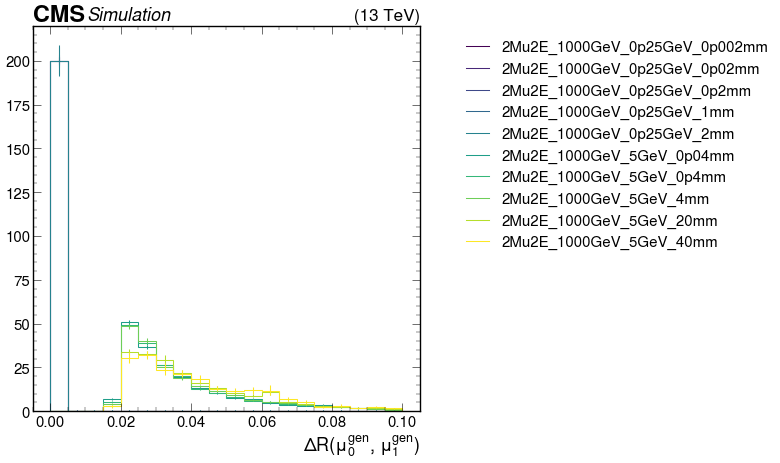

In [115]:
utilities.plot([output['out'][f"{name}"]['hists']["genMu_genMu_dR_lowRange"]["2mu2e_matchedLj",0j:0.1j] for name in samples_toPlot], density=True, color=colors)
plt.legend(samples_toPlot, loc=(1.1,0.4));

In [116]:
utilities.plot([output['out'][f"{name}"]['hists']["muon0_genMu0_ptRatio_vs_truept"]["2mu2e_matchedLj",::1j,::40j].profile("muon0_genMu0_ptRatio") for name in samples_toPlot], color=colors)
plt.ylabel("muon0_genMu0_ptRatio (profile)")
plt.ylim(top=1.5, bottom=0.5)
plt.legend(samples_toPlot, loc=(1.1,0.4));

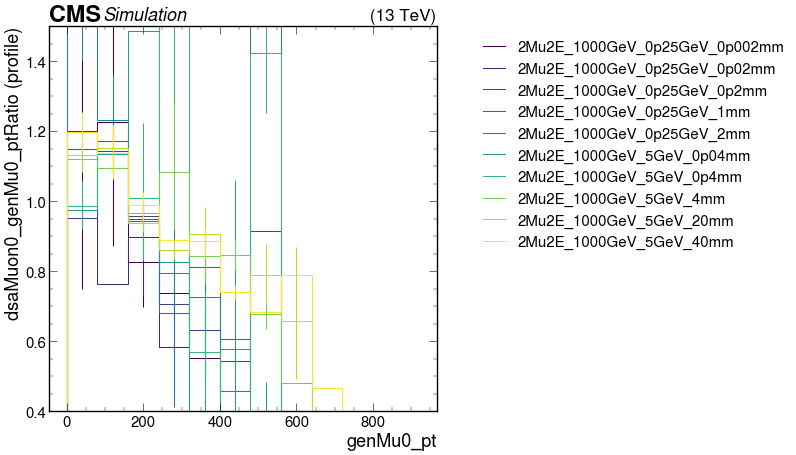

In [117]:
utilities.plot([output['out'][f"{name}"]['hists']["dsaMuon0_genMu0_ptRatio_vs_truept"]["2mu2e_matchedLj",::1j,::40j].profile("dsaMuon0_genMu0_ptRatio") for name in samples_toPlot], color=colors)
plt.ylabel("dsaMuon0_genMu0_ptRatio (profile)")
plt.ylim(top=1.5, bottom=0.4)
plt.legend(samples_toPlot, loc=(1.1,0.4));

/opt/conda/lib/python3.8/site-packages/mplhep/error_estimation.py:48: RuntimeWarning: divide by zero encountered in divide
  counts = sumw / scale


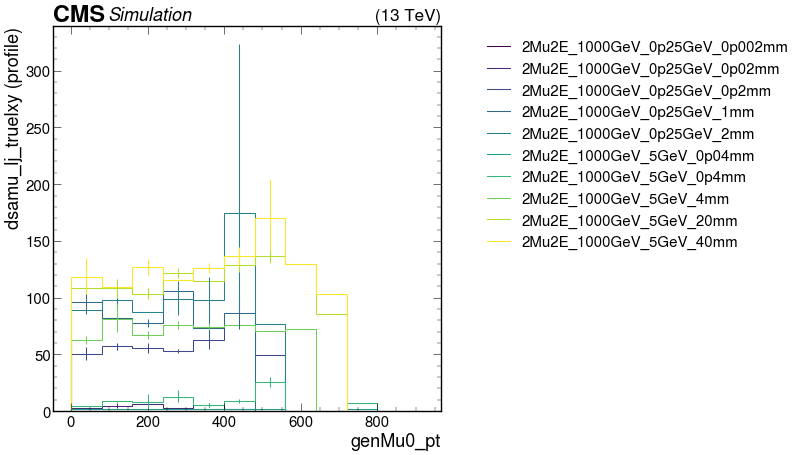

In [118]:
utilities.plot([output['out'][f"{name}"]['hists']["genMu0_truept_vs_dsaMuon0_lxy"]["2mu2e_matchedLj",::40j,::1j].profile("dsaMuon0_lj_truelxy") for name in samples_toPlot], color=colors)
plt.ylabel("dsamu_lj_truelxy (profile)")
# plt.ylim(top=1.5, bottom=0.5)
plt.legend(samples_toPlot, loc=(1.1,0.4));

/opt/conda/lib/python3.8/site-packages/mplhep/error_estimation.py:48: RuntimeWarning: divide by zero encountered in divide
  counts = sumw / scale
/opt/conda/lib/python3.8/site-packages/mplhep/error_estimation.py:48: RuntimeWarning: divide by zero encountered in divide
  counts = sumw / scale


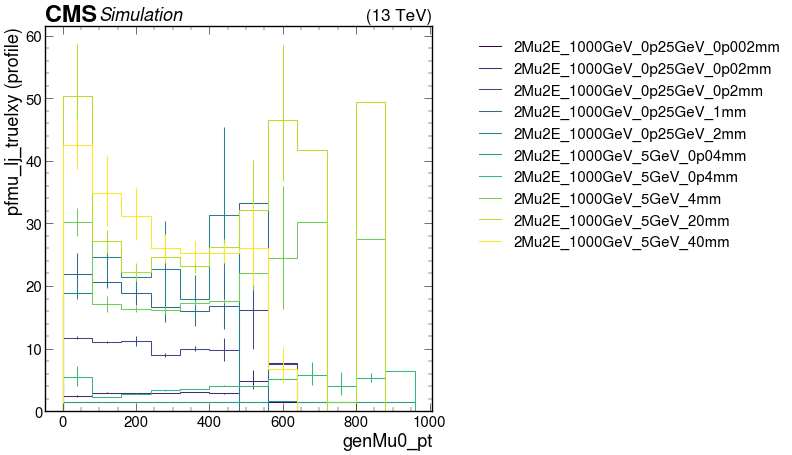

In [119]:
utilities.plot([output['out'][f"{name}"]['hists']["genMu0_truept_vs_muon0_lxy"]["2mu2e_matchedLj",::40j,::1j].profile("pfMuon0_lj_truelxy") for name in samples_toPlot], color=colors)
plt.ylabel("pfmu_lj_truelxy (profile)")
# plt.ylim(top=1.5, bottom=0.5)
plt.legend(samples_toPlot, loc=(1.1,0.4));

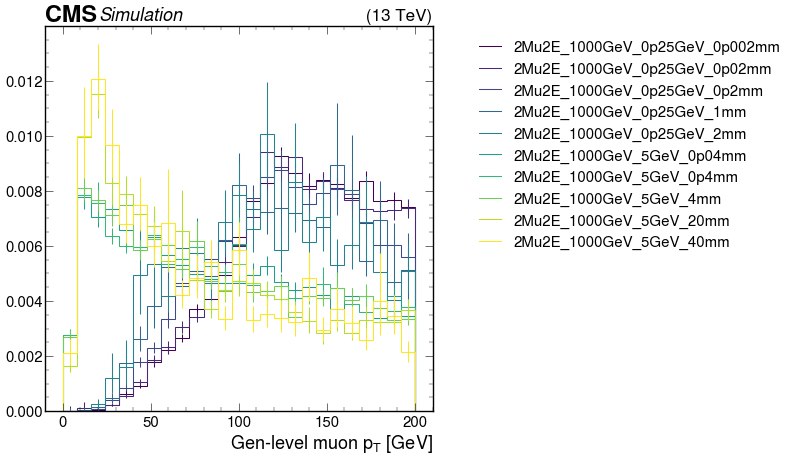

In [120]:
utilities.plot([output['out'][f"{name}"]['hists']["genMu_pt"]["2mu2e_matchedLj",::8j] for name in samples_toPlot], color=colors, density=True)
# plt.ylabel("pfmu_lj_truelxy (profile)")
# plt.ylim(top=1.5, bottom=0.5)
plt.legend(samples_toPlot, loc=(1.1,0.4));

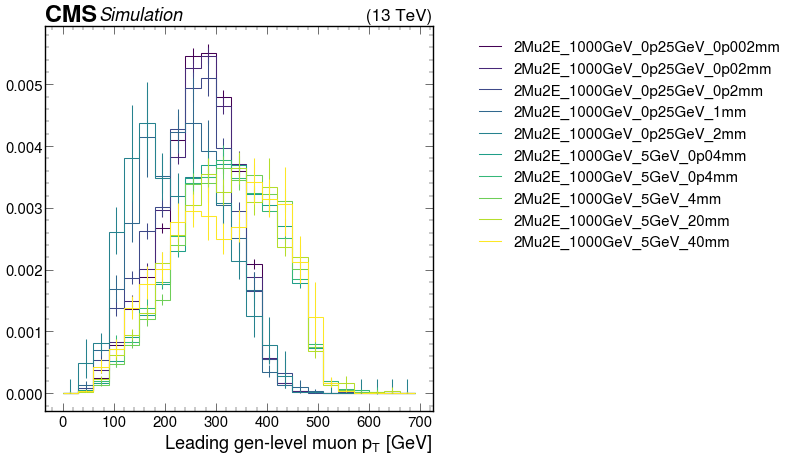

In [121]:
utilities.plot([output['out'][f"{name}"]['hists']["genMu0_pt_highRange"]["2mu2e_matchedLj",::3j] for name in samples_toPlot], color=colors, density=True)
# plt.ylabel("pfmu_lj_truelxy (profile)")
# plt.ylim(top=1.5, bottom=0.5)
plt.legend(samples_toPlot, loc=(1.1,0.4));

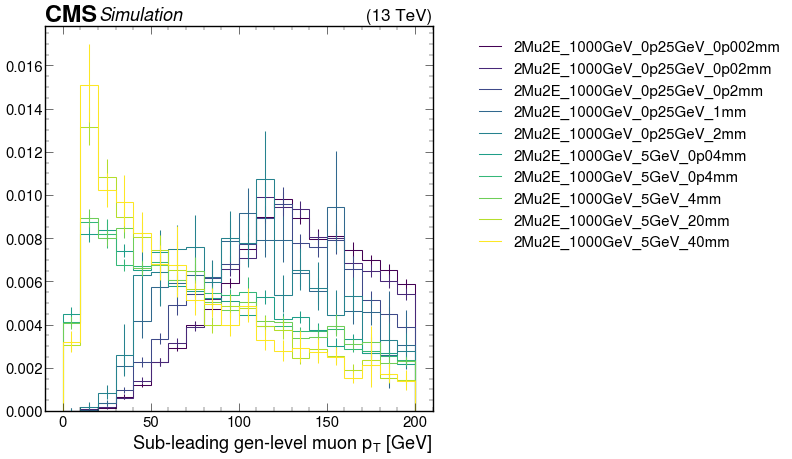

In [123]:
utilities.plot([output['out'][f"{name}"]['hists']["genMu1_pt"]["2mu2e_matchedLj",::5j] for name in samples_toPlot], color=colors, density=True)
# plt.ylabel("pfmu_lj_truelxy (profile)")
# plt.ylim(top=1.5, bottom=0.5)
plt.legend(samples_toPlot, loc=(1.1,0.4));

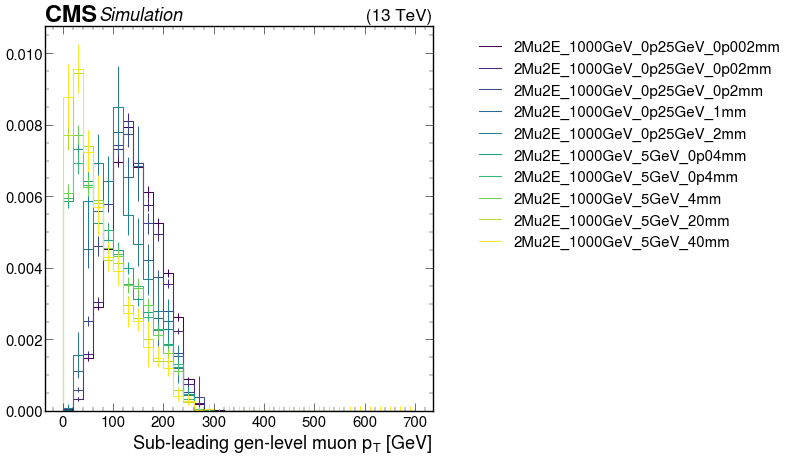

In [124]:
utilities.plot([output['out'][f"{name}"]['hists']["genMu1_pt_highRange"]["2mu2e_matchedLj",::2j] for name in samples_toPlot], color=colors, density=True)
# plt.ylabel("pfmu_lj_truelxy (profile)")
# plt.ylim(top=1.5, bottom=0.5)
plt.legend(samples_toPlot, loc=(1.1,0.4));

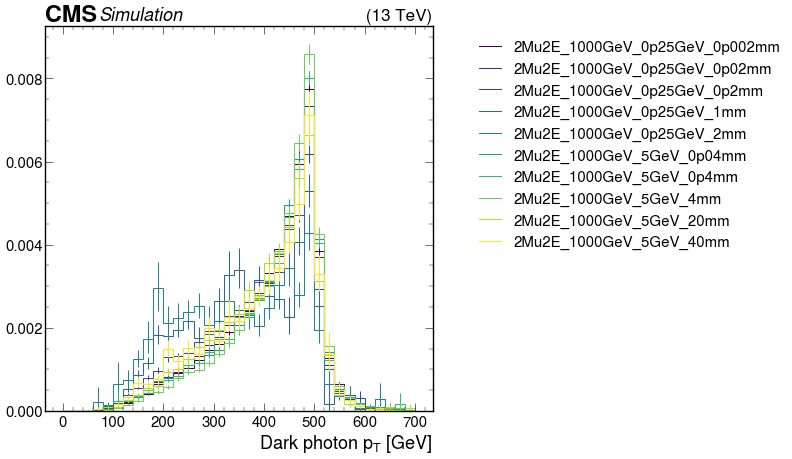

In [126]:
utilities.plot([output['out'][f"{name}"]['hists']["genA_pt_highRange"]["2mu2e_matchedLj",::4j] for name in samples_toPlot], color=colors, density=True)
# plt.ylabel("pfmu_lj_truelxy (profile)")
# plt.ylim(top=1.5, bottom=0.5)
plt.legend(samples_toPlot, loc=(1.1,0.4));

PF Muons dominate the lxy<50 region and DSA the lxy>50 region, most efficient in 50-150 band (from efficiency plot in AN)

These profile plots are stats limited but tell us a consistent story, PF muons suffer with increasing displacement. DSA Muons help regain our efficiency, but their resolution is ultimately lacking.

There's also the general theme of worse res with greater boost

### EGM type LJ

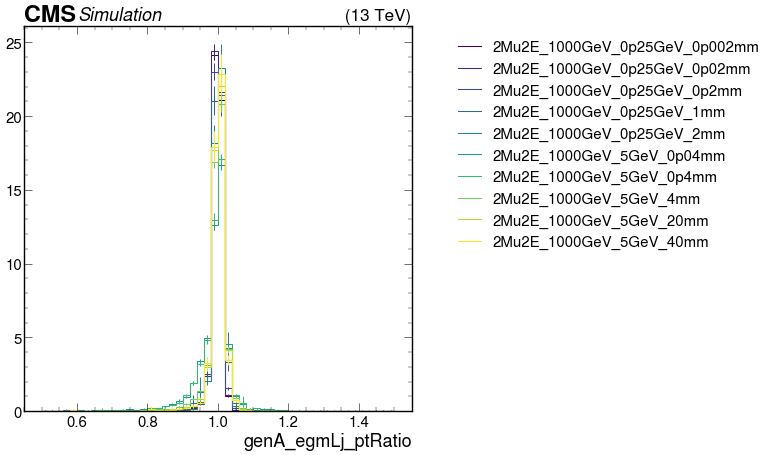

In [127]:
utilities.plot([output['out'][f"{name}"]['hists']["genA_egmLj_ptRatio"]["2mu2e_matchedLj",0.5j:1.5j:2j] for name in samples_toPlot], density=True, color=colors)
plt.legend(samples_toPlot, loc=(1.1,0.4));

/opt/conda/lib/python3.8/site-packages/mplhep/utils.py:263: RuntimeWarning: divide by zero encountered in double_scalars
  self.flat_scale(1 / np.sum(np.diff(self.edges) * self.values))
/opt/conda/lib/python3.8/site-packages/mplhep/error_estimation.py:38: RuntimeWarning: All sumw are zero!  Cannot compute meaningful error bars
  warnings.warn(
/opt/conda/lib/python3.8/site-packages/mplhep/utils.py:243: RuntimeWarning: invalid value encountered in multiply
  self.values *= scale
/opt/conda/lib/python3.8/site-packages/mplhep/utils.py:244: RuntimeWarning: invalid value encountered in multiply
  self.yerr_lo *= scale
/opt/conda/lib/python3.8/site-packages/mplhep/utils.py:245: RuntimeWarning: invalid value encountered in multiply
  self.yerr_hi *= scale
/opt/conda/lib/python3.8/site-packages/matplotlib/axes/_axes.py:1185: RuntimeWarning: All-NaN axis encountered
  miny = np.nanmin(masked_verts[..., 1])
/opt/conda/lib/python3.8/site-packages/matplotlib/axes/_axes.py:1186: RuntimeWarning: All

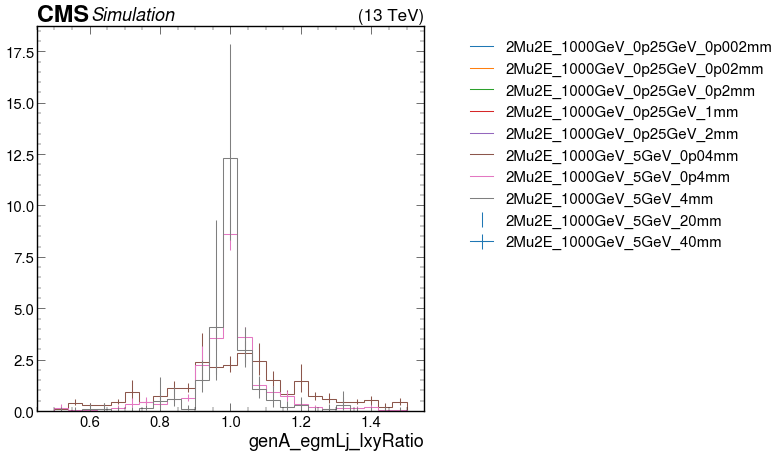

In [132]:
utilities.plot([output['out'][f"{name}"]['hists']["genA_egmLj_lxyRatio"]["2mu2e_matchedLj",0.5j:1.5j:4j] for name in samples_toPlot[:-2]], density=True)
plt.legend(samples_toPlot, loc=(1.1,0.4));

The above illustrates that the reco lxy is ill defined for a lot of the egm jets since they might be reco as photons etc

In [133]:
# for name in samples_toPlot:
#     f, ax = plt.subplots()
#     utilities.plot(output['out'][f"{name}"]['hists']["egm_lj_genA_ptRatio_vs_lxy"]["2mu2e_matchedLj",::4j,0j:50j:1j])
#     plt.text(0.05, 0.8, fr"{name}", color='white', transform = ax.transAxes)
#     plt.show()

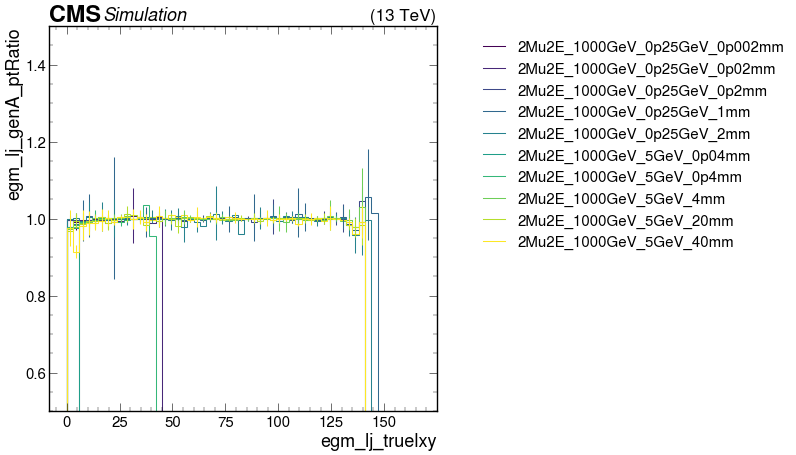

In [136]:
utilities.plot([output['out'][f"{name}"]['hists']["egm_lj_genA_ptRatio_vs_truelxy"]["2mu2e_matchedLj",::1j,:170j:1j].profile("egm_lj_genA_ptRatio") for name in samples_toPlot], color=colors)
plt.ylabel("egm_lj_genA_ptRatio")
plt.ylim(top=1.5, bottom=0.5)
plt.legend(samples_toPlot, loc=(1.1,0.4));

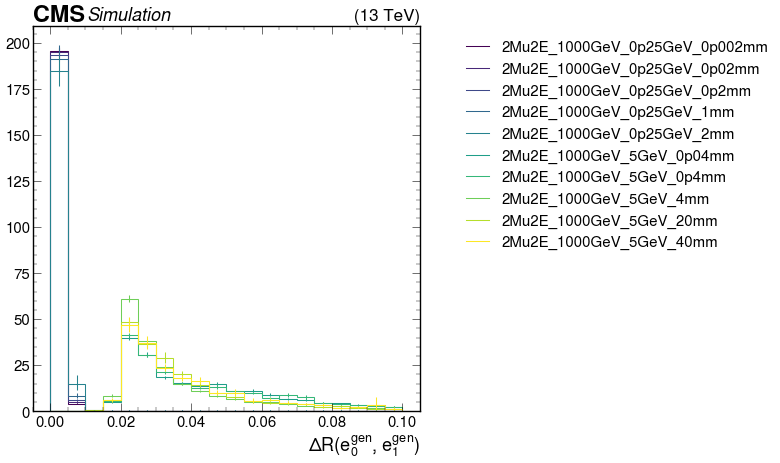

In [135]:
utilities.plot([output['out'][f"{name}"]['hists']["genE_genE_dR"]["2mu2e_matchedLj",0j:0.1j] for name in samples_toPlot], density=True, color=colors)
plt.legend(samples_toPlot, loc=(1.1,0.4));

We know the efficinecy for EGM Type LJs falls off at ~ lxy=160

Tracker ends at 110, ECAL at 175

Are we seeing that as long as we are efficient on EGM jets, our resolution will be pretty good? Certainly for the mX=1000 GeV case the EGM LJs have a better resolution than the Muon LJs, so this does look as expected. It seems this boosted system may benefit the resolution for EGM Jets?

### mX = 100 GeV Case

In [140]:
samples_toPlot = [
    "2Mu2E_100GeV_0p25GeV_0p02mm",
    "2Mu2E_100GeV_0p25GeV_0p2mm",
    "2Mu2E_100GeV_0p25GeV_2mm",
    "2Mu2E_100GeV_0p25GeV_10mm",
    "2Mu2E_100GeV_0p25GeV_20mm",
    "2Mu2E_100GeV_1p2GeV_0p096mm",
    "2Mu2E_100GeV_1p2GeV_0p96mm",
    "2Mu2E_100GeV_1p2GeV_9p6mm",
    "2Mu2E_100GeV_1p2GeV_48mm",
    "2Mu2E_100GeV_1p2GeV_96mm",
    "2Mu2E_100GeV_5GeV_0p4mm",
    "2Mu2E_100GeV_5GeV_4mm",
    "2Mu2E_100GeV_5GeV_40mm",
    "2Mu2E_100GeV_5GeV_200mm",
    "2Mu2E_100GeV_5GeV_400mm",
]
cmap = plt.cm.get_cmap('viridis')
colors = cmap(np.linspace(0, 1, len(samples_toPlot)))

/tmp/ipykernel_213/3701620158.py:18: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed two minor releases later. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap(obj)`` instead.
  cmap = plt.cm.get_cmap('viridis')


### Muon Type LJ and DSA/PF Muons

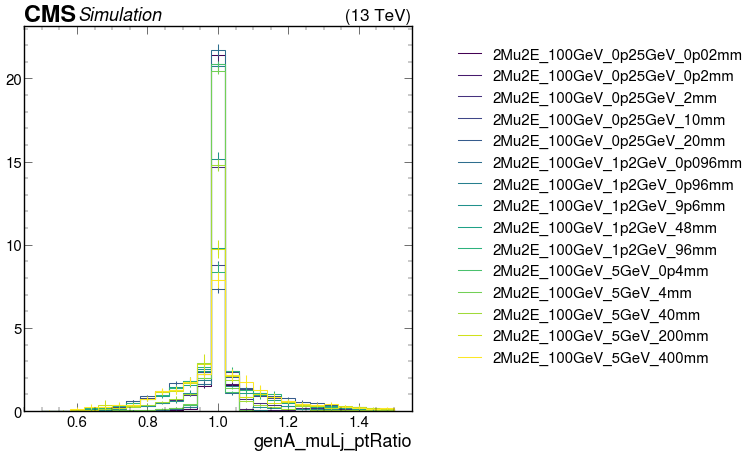

In [145]:
utilities.plot([output['out'][f"{name}"]['hists']["genA_muLj_ptRatio"]["2mu2e_matchedLj",0.5j:1.5j:4j] for name in samples_toPlot], density=True, color=colors)
plt.legend(samples_toPlot, loc=(1.1,0.1));

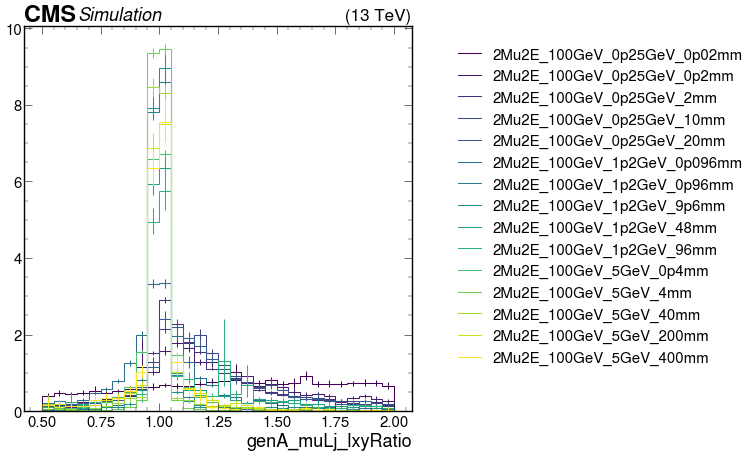

In [143]:
utilities.plot([output['out'][f"{name}"]['hists']["genA_muLj_lxyRatio"]["2mu2e_matchedLj",0.5j:2.0j:5j] for name in samples_toPlot], density=True, color=colors)
plt.legend(samples_toPlot, loc=(1.1,0.1));

In [107]:
# for name in samples_toPlot:
#     f, ax = plt.subplots()
#     utilities.plot(output['out'][f"{name}"]['hists']["mu_lj_genA_ptRatio_vs_recolxy"]["2mu2e_matchedLj",::4j,0j:50j:1j])
#     plt.text(0.05, 0.8, fr"{name}", color='white', transform = ax.transAxes)
#     plt.show()

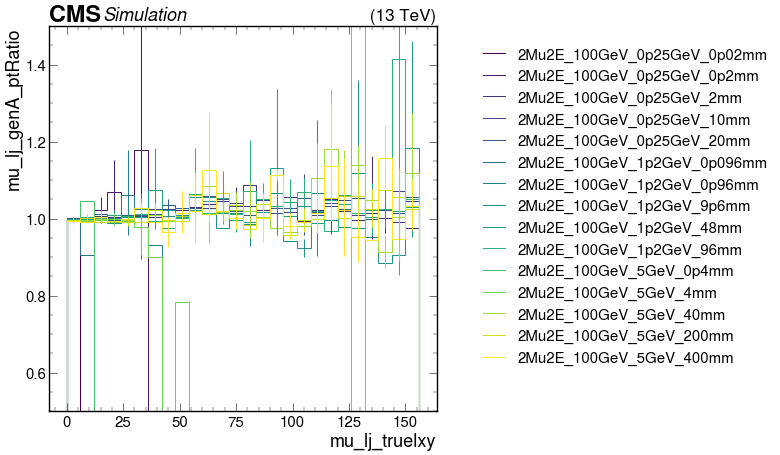

In [146]:
utilities.plot([output['out'][f"{name}"]['hists']["mu_lj_genA_ptRatio_vs_truelxy"]["2mu2e_matchedLj",::1j,:160j:2j].profile("mu_lj_genA_ptRatio") for name in samples_toPlot], color=colors)
plt.ylabel("mu_lj_genA_ptRatio")
plt.ylim(top=1.5, bottom=0.5)
plt.legend(samples_toPlot, loc=(1.1,0.1));

/opt/conda/lib/python3.8/site-packages/mplhep/error_estimation.py:48: RuntimeWarning: divide by zero encountered in divide
  counts = sumw / scale
/opt/conda/lib/python3.8/site-packages/mplhep/error_estimation.py:48: RuntimeWarning: divide by zero encountered in divide
  counts = sumw / scale


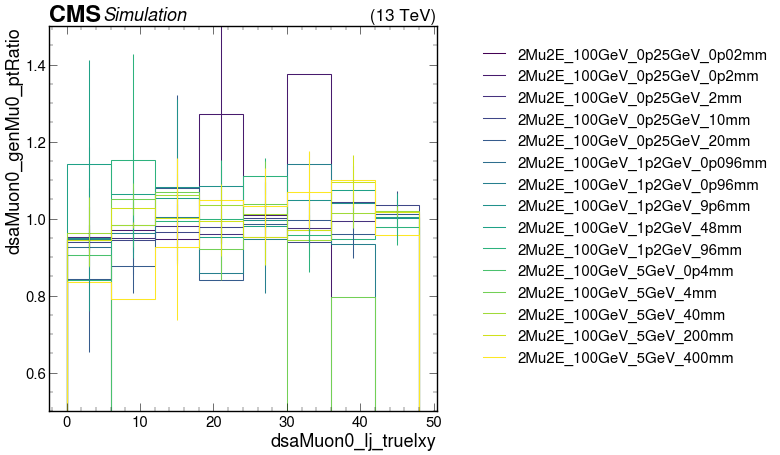

In [147]:
utilities.plot([output['out'][f"{name}"]['hists']["dsaMuon0_genMu0_ptRatio_vs_truelxy"]["2mu2e_matchedLj",::1j,0j:50j:2j].profile("dsaMuon0_genMu0_ptRatio") for name in samples_toPlot], color=colors)
plt.ylabel("dsaMuon0_genMu0_ptRatio")
plt.ylim(top=1.5, bottom=0.5)
plt.legend(samples_toPlot, loc=(1.1,0.1));

/opt/conda/lib/python3.8/site-packages/matplotlib/axes/_axes.py:1185: RuntimeWarning: All-NaN axis encountered
  miny = np.nanmin(masked_verts[..., 1])
/opt/conda/lib/python3.8/site-packages/matplotlib/axes/_axes.py:1186: RuntimeWarning: All-NaN axis encountered
  maxy = np.nanmax(masked_verts[..., 1])
/opt/conda/lib/python3.8/site-packages/matplotlib/axes/_axes.py:1185: RuntimeWarning: All-NaN axis encountered
  miny = np.nanmin(masked_verts[..., 1])
/opt/conda/lib/python3.8/site-packages/matplotlib/axes/_axes.py:1186: RuntimeWarning: All-NaN axis encountered
  maxy = np.nanmax(masked_verts[..., 1])
/opt/conda/lib/python3.8/site-packages/matplotlib/axes/_axes.py:1185: RuntimeWarning: All-NaN axis encountered
  miny = np.nanmin(masked_verts[..., 1])
/opt/conda/lib/python3.8/site-packages/matplotlib/axes/_axes.py:1186: RuntimeWarning: All-NaN axis encountered
  maxy = np.nanmax(masked_verts[..., 1])
/opt/conda/lib/python3.8/site-packages/matplotlib/axes/_axes.py:1185: RuntimeWarning: Al

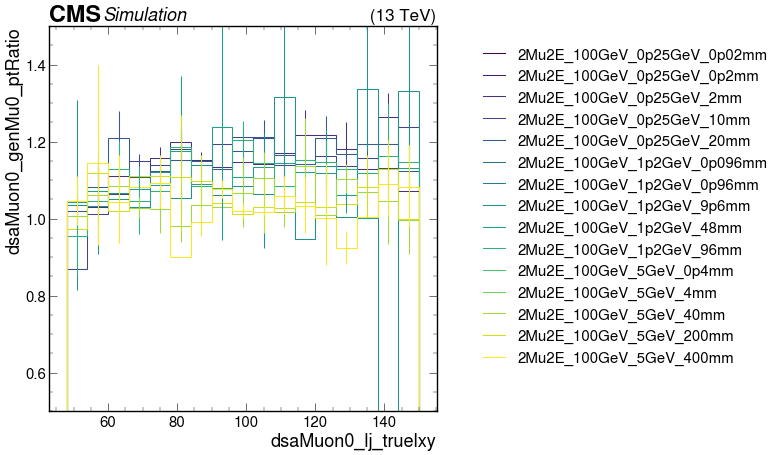

In [148]:
utilities.plot([output['out'][f"{name}"]['hists']["dsaMuon0_genMu0_ptRatio_vs_truelxy"]["2mu2e_matchedLj",::1j,50j:150j:2j].profile("dsaMuon0_genMu0_ptRatio") for name in samples_toPlot], color=colors)
plt.ylabel("dsaMuon0_genMu0_ptRatio")
plt.ylim(top=1.5, bottom=0.5)
plt.legend(samples_toPlot, loc=(1.1,0.1));

/opt/conda/lib/python3.8/site-packages/mplhep/error_estimation.py:48: RuntimeWarning: divide by zero encountered in divide
  counts = sumw / scale


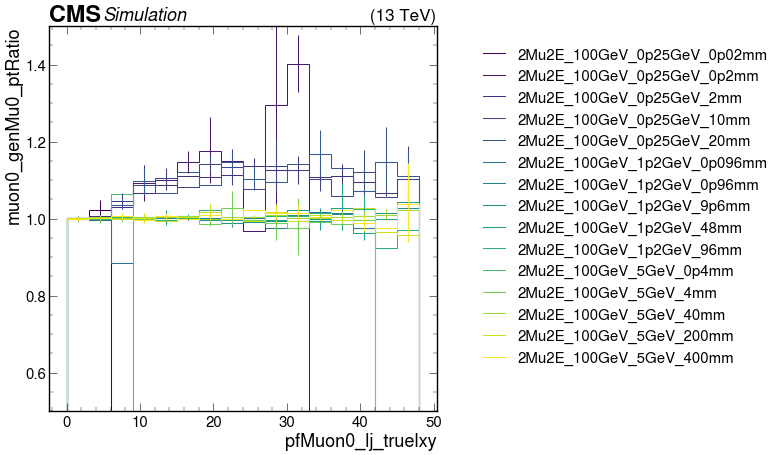

In [149]:
utilities.plot([output['out'][f"{name}"]['hists']["muon0_genMu0_ptRatio_vs_truelxy"]["2mu2e_matchedLj",::1j,0j:50j:1j].profile("muon0_genMu0_ptRatio") for name in samples_toPlot], color=colors)
plt.ylabel("muon0_genMu0_ptRatio")
plt.ylim(top=1.5, bottom=0.5)
plt.legend(samples_toPlot, loc=(1.1,0.1));

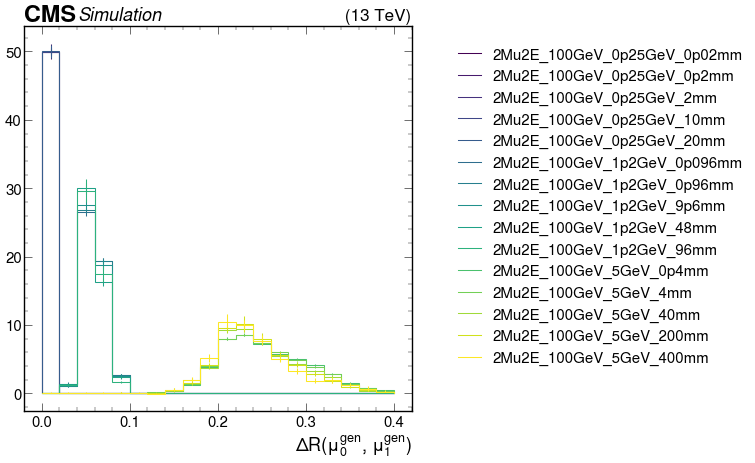

In [150]:
utilities.plot([output['out'][f"{name}"]['hists']["genMu_genMu_dR"]["2mu2e_matchedLj",0j:0.4j] for name in samples_toPlot], density=True, color=colors)
plt.legend(samples_toPlot, loc=(1.1,0.1));

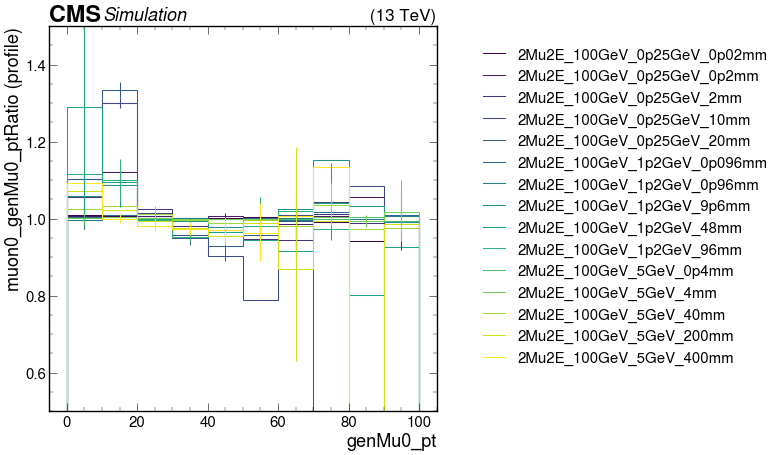

In [151]:
utilities.plot([output['out'][f"{name}"]['hists']["muon0_genMu0_ptRatio_vs_truept"]["2mu2e_matchedLj",::1j,:100j:5j].profile("muon0_genMu0_ptRatio") for name in samples_toPlot], color=colors)
plt.ylabel("muon0_genMu0_ptRatio (profile)")
plt.ylim(top=1.5, bottom=0.5)
plt.legend(samples_toPlot, loc=(1.1,0.1));

/opt/conda/lib/python3.8/site-packages/mplhep/error_estimation.py:48: RuntimeWarning: divide by zero encountered in divide
  counts = sumw / scale
/opt/conda/lib/python3.8/site-packages/mplhep/error_estimation.py:48: RuntimeWarning: divide by zero encountered in divide
  counts = sumw / scale
/opt/conda/lib/python3.8/site-packages/mplhep/error_estimation.py:48: RuntimeWarning: divide by zero encountered in divide
  counts = sumw / scale


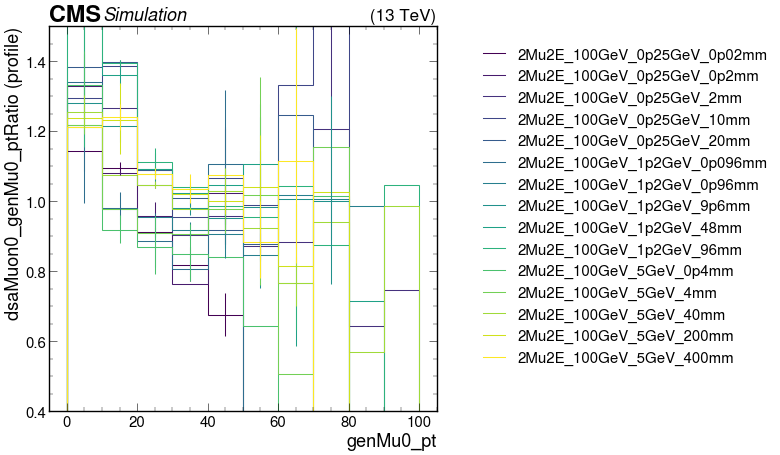

In [153]:
utilities.plot([output['out'][f"{name}"]['hists']["dsaMuon0_genMu0_ptRatio_vs_truept"]["2mu2e_matchedLj",::1j,:100j:5j].profile("dsaMuon0_genMu0_ptRatio") for name in samples_toPlot], color=colors)
plt.ylabel("dsaMuon0_genMu0_ptRatio (profile)")
plt.ylim(top=1.5, bottom=0.4)
plt.legend(samples_toPlot, loc=(1.1,0.1));

/opt/conda/lib/python3.8/site-packages/mplhep/error_estimation.py:48: RuntimeWarning: divide by zero encountered in divide
  counts = sumw / scale
/opt/conda/lib/python3.8/site-packages/mplhep/error_estimation.py:48: RuntimeWarning: divide by zero encountered in divide
  counts = sumw / scale
/opt/conda/lib/python3.8/site-packages/mplhep/error_estimation.py:48: RuntimeWarning: divide by zero encountered in divide
  counts = sumw / scale
/opt/conda/lib/python3.8/site-packages/mplhep/error_estimation.py:48: RuntimeWarning: divide by zero encountered in divide
  counts = sumw / scale
/opt/conda/lib/python3.8/site-packages/mplhep/error_estimation.py:48: RuntimeWarning: divide by zero encountered in divide
  counts = sumw / scale
/opt/conda/lib/python3.8/site-packages/mplhep/error_estimation.py:48: RuntimeWarning: divide by zero encountered in divide
  counts = sumw / scale
/opt/conda/lib/python3.8/site-packages/mplhep/error_estimation.py:48: RuntimeWarning: divide by zero encountered in di

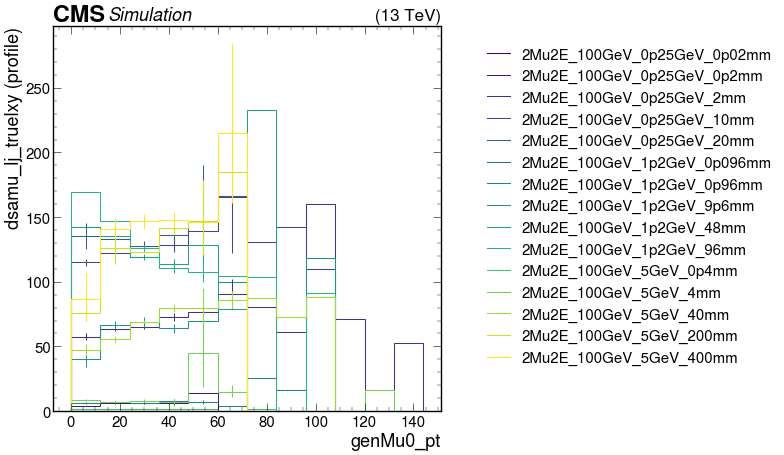

In [154]:
utilities.plot([output['out'][f"{name}"]['hists']["genMu0_truept_vs_dsaMuon0_lxy"]["2mu2e_matchedLj",:150j:6j,::1j].profile("dsaMuon0_lj_truelxy") for name in samples_toPlot], color=colors)
plt.ylabel("dsamu_lj_truelxy (profile)")
# plt.ylim(top=1.5, bottom=0.5)
plt.legend(samples_toPlot, loc=(1.1,0.1));

/opt/conda/lib/python3.8/site-packages/mplhep/error_estimation.py:48: RuntimeWarning: divide by zero encountered in divide
  counts = sumw / scale
/opt/conda/lib/python3.8/site-packages/mplhep/error_estimation.py:48: RuntimeWarning: divide by zero encountered in divide
  counts = sumw / scale
/opt/conda/lib/python3.8/site-packages/mplhep/error_estimation.py:48: RuntimeWarning: divide by zero encountered in divide
  counts = sumw / scale


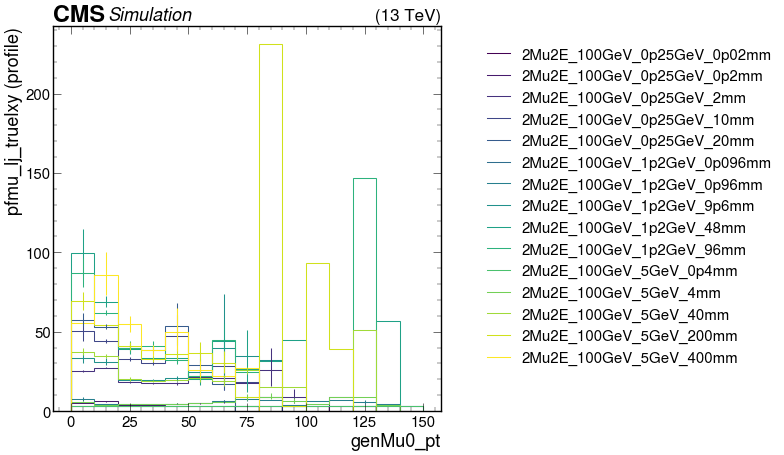

In [155]:
utilities.plot([output['out'][f"{name}"]['hists']["genMu0_truept_vs_muon0_lxy"]["2mu2e_matchedLj",:150j:5j,::2j].profile("pfMuon0_lj_truelxy") for name in samples_toPlot], color=colors)
plt.ylabel("pfmu_lj_truelxy (profile)")
# plt.ylim(top=1.5, bottom=0.5)
plt.legend(samples_toPlot, loc=(1.1,0.1));

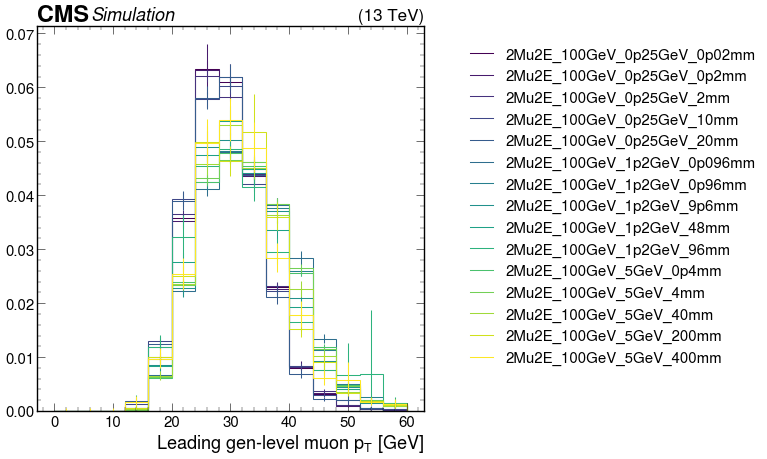

In [156]:
utilities.plot([output['out'][f"{name}"]['hists']["genMu0_pt"]["2mu2e_matchedLj",:60j:4j] for name in samples_toPlot], color=colors, density=True)
# plt.ylabel("pfmu_lj_truelxy (profile)")
# plt.ylim(top=1.5, bottom=0.5)
plt.legend(samples_toPlot, loc=(1.1,0.1));

PF Muons dominate the lxy<50 region and DSA the lxy>50 region, most efficient in 50-150 band (from efficiency plot in AN)

In the mX=100GeV case, things are quite different. The system is not as boosted since the resonance at the start is not as heavy. This lack of (strong?) collimation seems to really help the Muon type LJs, both PF and DSA muons seem to benefit. The overall trends of PF getting worse with displacement, and DSA being somewhat unaffected is still there weakly, but the overall efficiencies are better here.

### EGM Type LJ

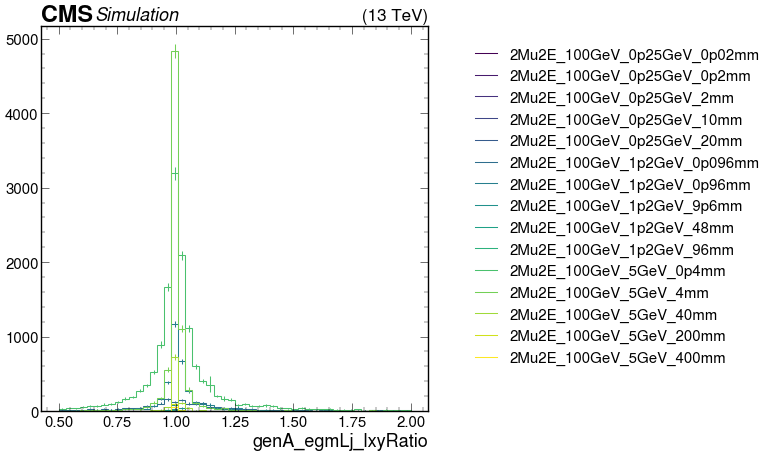

In [157]:
# kinvtx is not well defined for all LJs, especially cases where egm jets are like 1e or 1y etc
utilities.plot([output['out'][f"{name}"]['hists']["genA_egmLj_lxyRatio"]["2mu2e_matchedLj",0.5j:2.0j:3j] for name in samples_toPlot], density=False, color=colors)
plt.legend(samples_toPlot, loc=(1.1,0.1));

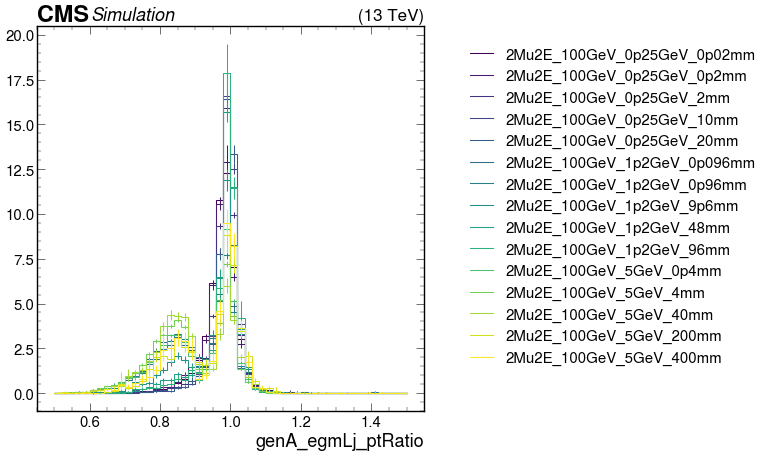

In [159]:
utilities.plot([output['out'][f"{name}"]['hists']["genA_egmLj_ptRatio"]["2mu2e_matchedLj",0.5j:1.5j:2j] for name in samples_toPlot], density=True, color=colors)
plt.legend(samples_toPlot, loc=(1.1,0.1));

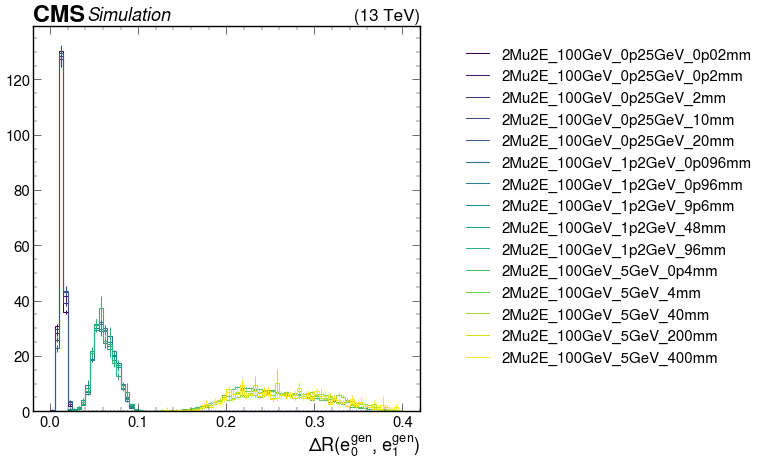

In [160]:
utilities.plot([output['out'][f"{name}"]['hists']["genE_genE_dR"]["2mu2e_matchedLj",0j:0.4j] for name in samples_toPlot], density=True, color=colors)
plt.legend(samples_toPlot, loc=(1.1,0.1));

The 2 peak structure in the pT Ratio might be due to missing particles. For mX=100 and mDP=5GeV, the overall collimation is worse off and so this might make sense

In [161]:
# for name in samples_toPlot:
#     f, ax = plt.subplots()
#     utilities.plot(output['out'][f"{name}"]['hists']["egm_lj_genA_ptRatio_vs_lxy"]["2mu2e_matchedLj",::4j,0j:50j:1j])
#     plt.text(0.05, 0.8, fr"{name}", color='white', transform = ax.transAxes)
#     plt.show()

/opt/conda/lib/python3.8/site-packages/mplhep/error_estimation.py:48: RuntimeWarning: divide by zero encountered in divide
  counts = sumw / scale
/opt/conda/lib/python3.8/site-packages/mplhep/error_estimation.py:48: RuntimeWarning: divide by zero encountered in divide
  counts = sumw / scale


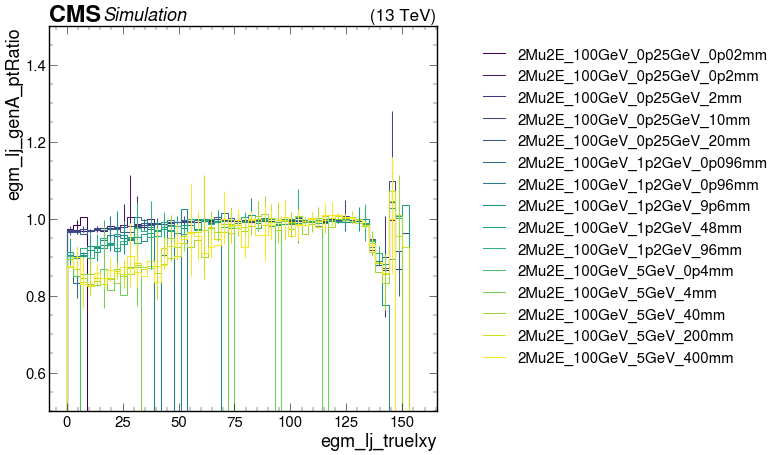

In [162]:
utilities.plot([output['out'][f"{name}"]['hists']["egm_lj_genA_ptRatio_vs_truelxy"]["2mu2e_matchedLj",::1j,:160j:1j].profile("egm_lj_genA_ptRatio") for name in samples_toPlot], color=colors)
plt.ylabel("egm_lj_genA_ptRatio")
plt.ylim(top=1.5, bottom=0.5)
plt.legend(samples_toPlot, loc=(1.1,0.1));

In [ ]:
utilities.plot([output['out'][f"{name}"]['hists']["egmLj_ptRatio_vs_egm_truept"]["2mu2e_matchedLj",::1j,:160j:1j].profile("egm_lj_genA_ptRatio") for name in samples_toPlot], color=colors)
plt.ylabel("egm_lj_genA_ptRatio")
plt.ylim(top=1.5, bottom=0.5)
plt.legend(samples_toPlot, loc=(1.1,0.1));

For mX=100 GeV, the EGM jets story is different. The poorer boosting/collimation seems to hurt us here, even for the jets that don't have missing particles the res is not as good as the mX=1000 case. Naturally the jets that have missing particles will suffer even more. 

In missing particle case, longer lxy means more boosted system, so then it makes sense the the missing particle effect goes down as lxy grows for the mDP=5 GeV case

## What did I learn from all of this?

More collimation -> helps EGM jets, gives them better resolution and ensures we dont have missing particles

EGM TODO : Photons vs Electrons
EGM : look at reco objects around DP, 

More collimation -> hurts muon type LJs. Primarily PF muons, DSA muons don't show a strong trend.

Muon TODO : is it worse pT res or increasing collimation that hurts more?

Muon TODO : make muon LJ plots connected to the muon0 and dsoMuon0 things
